<a href="https://colab.research.google.com/github/JaehwanKim00/ML_4AI/blob/main/code/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data





In [2]:
import random
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm
import librosa

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
CFG = {
    'SR':16000,
    'N_MFCC':32, # Melspectrogram 벡터를 추출할 개수
    'SEED':42
}

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/test.csv')

In [7]:
# 경로 수정
base_path = '/content/drive/MyDrive/ML4_AI/data/open/'

# 'path' 열의 상대 경로에서 './' 제거 및 절대 경로로 변환
train_df['path'] = train_df['path'].str.replace('./', '', regex=False)  # './' 제거
train_df['path'] = train_df['path'].apply(lambda x: os.path.join(base_path, x))

test_df['path'] = test_df['path'].str.replace('./', '', regex=False)  # './' 제거
test_df['path'] = test_df['path'].apply(lambda x: os.path.join(base_path, x))


In [8]:
train_df['path']

,path
0,/content/drive/MyDrive/ML4_AI/data/open/train/...
1,/content/drive/MyDrive/ML4_AI/data/open/train/...
2,/content/drive/MyDrive/ML4_AI/data/open/train/...
3,/content/drive/MyDrive/ML4_AI/data/open/train/...
4,/content/drive/MyDrive/ML4_AI/data/open/train/...
...,...
4996,/content/drive/MyDrive/ML4_AI/data/open/train/...
4997,/content/drive/MyDrive/ML4_AI/data/open/train/...
4998,/content/drive/MyDrive/ML4_AI/data/open/train/...
4999,/content/drive/MyDrive/ML4_AI/data/open/train/...


In [6]:
def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['path']):
        # librosa패키지를 사용하여 wav 파일 load
        y, sr = librosa.load(path, sr=CFG['SR'])
        # librosa패키지를 사용하여 mfcc 추출
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])
        y_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
        for e in mfcc:
            y_feature.append(np.mean(e))
        features.append(y_feature)

    mfcc_df = pd.DataFrame(features, columns=['mfcc_'+str(x) for x in range(1,CFG['N_MFCC']+1)])
    return mfcc_df

In [ ]:
train_x = get_mfcc_feature(train_df)
test_x = get_mfcc_feature(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
train_y = train_df['label']

In [ ]:
train_x.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.755737,110.100639,46.699074,23.939814,14.766221,4.820827,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.769531,83.051300,55.473316,31.782587,22.040751,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.145081,97.399071,38.274349,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.963715,118.961670,34.490349,24.178419,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.863220,117.553337,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894948,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282429,1.643819,2.032168,-0.533625,-1.729753


In [ ]:
train_y.head()

,label
0,1
1,2
2,4
3,5
4,4


# Augmented

In [ ]:
augmented_train_df = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augmented/augmentation_log.csv')
print(augmented_train_df)

      stretch_rate  pitch_steps  noise_factor          id  \
0         0.884700          NaN           NaN  TRAIN_0000   
1              NaN     1.639811           NaN  TRAIN_0001   
2              NaN          NaN           NaN  TRAIN_0002   
3         1.141533    -1.140144           NaN  TRAIN_0003   
4         0.876131     1.580911           NaN  TRAIN_0004   
...            ...          ...           ...         ...   
4996      0.897102     0.978811      0.004708  TRAIN_4996   
4997      0.847632     0.289799      0.004420  TRAIN_4997   
4998           NaN    -0.100535           NaN  TRAIN_4998   
4999           NaN     0.217326      0.009972  TRAIN_4999   
5000      1.198306          NaN           NaN  TRAIN_5000   

                                     original_path  \
0     /content/extracted/open/train/TRAIN_0000.wav   
1     /content/extracted/open/train/TRAIN_0001.wav   
2     /content/extracted/open/train/TRAIN_0002.wav   
3     /content/extracted/open/train/TRAIN_0003.wav 

In [ ]:
import os

# 변경하고자 하는 기본 경로 설정
base_path = '/content/drive/MyDrive/ML4_AI/data/open/augmented/train_augmented/'

# 기존 경로에서 특정 부분('/content/extracted/augmented/')을 제거한 후 새로운 base_path를 붙이는 방식
augmented_train_df['augmented_path'] = augmented_train_df['augmented_path'].str.replace('/content/extracted/augmented/', '', regex=False)
augmented_train_df['augmented_path'] = augmented_train_df['augmented_path'].apply(lambda x: os.path.join(base_path, x))
print(augmented_train_df)

      stretch_rate  pitch_steps  noise_factor          id  \
0         0.884700          NaN           NaN  TRAIN_0000   
1              NaN     1.639811           NaN  TRAIN_0001   
2              NaN          NaN           NaN  TRAIN_0002   
3         1.141533    -1.140144           NaN  TRAIN_0003   
4         0.876131     1.580911           NaN  TRAIN_0004   
...            ...          ...           ...         ...   
4996      0.897102     0.978811      0.004708  TRAIN_4996   
4997      0.847632     0.289799      0.004420  TRAIN_4997   
4998           NaN    -0.100535           NaN  TRAIN_4998   
4999           NaN     0.217326      0.009972  TRAIN_4999   
5000      1.198306          NaN           NaN  TRAIN_5000   

                                     original_path  \
0     /content/extracted/open/train/TRAIN_0000.wav   
1     /content/extracted/open/train/TRAIN_0001.wav   
2     /content/extracted/open/train/TRAIN_0002.wav   
3     /content/extracted/open/train/TRAIN_0003.wav 

In [ ]:
augmented_train_df['id'] = augmented_train_df['id'].astype(str) + '_augmented'
print(augmented_train_df)

      stretch_rate  pitch_steps  noise_factor                    id  \
0         0.884700          NaN           NaN  TRAIN_0000_augmented   
1              NaN     1.639811           NaN  TRAIN_0001_augmented   
2              NaN          NaN           NaN  TRAIN_0002_augmented   
3         1.141533    -1.140144           NaN  TRAIN_0003_augmented   
4         0.876131     1.580911           NaN  TRAIN_0004_augmented   
...            ...          ...           ...                   ...   
4996      0.897102     0.978811      0.004708  TRAIN_4996_augmented   
4997      0.847632     0.289799      0.004420  TRAIN_4997_augmented   
4998           NaN    -0.100535           NaN  TRAIN_4998_augmented   
4999           NaN     0.217326      0.009972  TRAIN_4999_augmented   
5000      1.198306          NaN           NaN  TRAIN_5000_augmented   

                                     original_path  \
0     /content/extracted/open/train/TRAIN_0000.wav   
1     /content/extracted/open/train/TRA

In [ ]:
df_sampled = augmented_train_df[['id', 'augmented_path', 'label']].sample(frac=1, random_state=42)
print(df_sampled.head())


                        id                                     augmented_path  \
1501  TRAIN_1501_augmented  /content/drive/MyDrive/ML4_AI/data/open/augmen...   
2586  TRAIN_2586_augmented  /content/drive/MyDrive/ML4_AI/data/open/augmen...   
2653  TRAIN_2653_augmented  /content/drive/MyDrive/ML4_AI/data/open/augmen...   
1055  TRAIN_1055_augmented  /content/drive/MyDrive/ML4_AI/data/open/augmen...   
705   TRAIN_0705_augmented  /content/drive/MyDrive/ML4_AI/data/open/augmen...   

      label  
1501      5  
2586      5  
2653      4  
1055      4  
705       2  


In [ ]:
df_sampled = df_sampled.rename(columns={'augmented_path': 'path'})
df_sampled.head()

,id,path,label
1501,TRAIN_1501_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,5
2586,TRAIN_2586_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,5
2653,TRAIN_2653_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,4
1055,TRAIN_1055_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,4
705,TRAIN_0705_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,2


In [ ]:
train_df = pd.concat([train_df, df_sampled], ignore_index=True)
train_df

,id,path,label
0,TRAIN_0000,/content/drive/MyDrive/ML4_AI/data/open/train/...,1
1,TRAIN_0001,/content/drive/MyDrive/ML4_AI/data/open/train/...,2
2,TRAIN_0002,/content/drive/MyDrive/ML4_AI/data/open/train/...,4
3,TRAIN_0003,/content/drive/MyDrive/ML4_AI/data/open/train/...,5
4,TRAIN_0004,/content/drive/MyDrive/ML4_AI/data/open/train/...,4
...,...,...,...
9997,TRAIN_4426_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,0
9998,TRAIN_0466_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,3
9999,TRAIN_3092_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,2
10000,TRAIN_3772_augmented,/content/drive/MyDrive/ML4_AI/data/open/augmen...,2


In [ ]:
def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['path']):
        # librosa패키지를 사용하여 wav 파일 load
        y, sr = librosa.load(path, sr=CFG['SR'])
        # librosa패키지를 사용하여 mfcc 추출
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])
        y_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
        for e in mfcc:
            y_feature.append(np.mean(e))
        features.append(y_feature)

    mfcc_df = pd.DataFrame(features, columns=['mfcc_'+str(x) for x in range(1,CFG['N_MFCC']+1)])
    return mfcc_df

In [ ]:
train_x = get_mfcc_feature(train_df)
train_x.head()

  0%|          | 0/10002 [00:00<?, ?it/s]

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.755737,110.100639,46.699074,23.939814,14.766221,4.820827,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.769531,83.051300,55.473316,31.782587,22.040751,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.145081,97.399071,38.274349,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.963715,118.961670,34.490349,24.178419,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.863220,117.553337,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894948,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282429,1.643819,2.032168,-0.533625,-1.729753


In [ ]:
train_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.755737,110.100639,46.699074,23.939814,14.766221,4.820827,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.769531,83.051300,55.473316,31.782587,22.040751,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.145081,97.399071,38.274349,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.963715,118.961670,34.490349,24.178419,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.863220,117.553337,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894948,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282429,1.643819,2.032168,-0.533625,-1.729753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,-259.533997,61.047497,21.610571,8.853652,-4.338743,-6.072715,-5.102638,-9.316243,-3.272752,-2.342980,...,0.085967,-0.586807,-0.825031,-0.054219,-0.579020,-0.342664,1.527484,2.372591,0.886842,-0.799345
9998,-284.703979,53.461357,37.676674,22.214521,7.293533,-1.787100,-7.004971,-7.355950,-4.049416,-2.282302,...,-3.018300,-1.134890,0.914323,1.011132,0.213735,-0.911147,-1.938297,-1.729160,-1.106936,-1.228920
9999,-230.161758,27.623686,20.763842,13.076402,6.421532,-0.229064,-4.217036,-1.941158,-2.140555,-3.812724,...,0.367151,0.366191,-0.522699,-0.936152,-2.339480,-2.636004,-1.651041,-0.997180,-1.733912,-0.694467
10000,-246.077530,36.943520,25.920174,13.858925,6.811438,1.741722,-2.028136,-3.922310,-3.181913,-2.167507,...,0.038170,0.650024,0.935587,0.744236,1.329125,1.499736,1.367689,0.284328,0.079153,0.344908


In [ ]:
train_x.to_csv("augment_all.csv", index=False)


In [ ]:
df = pd.read_csv('/content/augment_all.csv')
df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.75574,110.100640,46.699074,23.939814,14.766221,4.820826,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.76953,83.051300,55.473316,31.782587,22.040750,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.14508,97.399070,38.274350,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.96370,118.961670,34.490350,24.178420,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.86322,117.553340,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894947,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282430,1.643819,2.032168,-0.533625,-1.729753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,-259.53400,61.047497,21.610570,8.853652,-4.338743,-6.072715,-5.102638,-9.316243,-3.272752,-2.342980,...,0.085967,-0.586807,-0.825031,-0.054219,-0.579020,-0.342664,1.527484,2.372591,0.886842,-0.799345
9998,-284.70398,53.461357,37.676674,22.214521,7.293533,-1.787100,-7.004971,-7.355950,-4.049416,-2.282302,...,-3.018300,-1.134890,0.914323,1.011132,0.213735,-0.911147,-1.938297,-1.729160,-1.106936,-1.228920
9999,-230.16176,27.623686,20.763842,13.076402,6.421532,-0.229064,-4.217036,-1.941158,-2.140555,-3.812724,...,0.367151,0.366191,-0.522699,-0.936152,-2.339480,-2.636004,-1.651041,-0.997180,-1.733912,-0.694467
10000,-246.07753,36.943520,25.920174,13.858925,6.811438,1.741722,-2.028136,-3.922310,-3.181913,-2.167507,...,0.038170,0.650023,0.935587,0.744236,1.329125,1.499736,1.367690,0.284328,0.079153,0.344908


In [ ]:
train_y = train_df['label']
train_y.head()

,label
0,1
1,2
2,4
3,5
4,4


In [ ]:
train_y

,label
0,1
1,2
2,4
3,5
4,4
...,...
9997,0
9998,3
9999,2
10000,2


In [ ]:
train_y.to_csv('augmtent_all_label.csv',index=False)

In [ ]:
df = pd.read_csv('/content/augmtent_all_label.csv')

In [ ]:
df

,label
0,1
1,2
2,4
3,5
4,4
...,...
9997,0
9998,3
9999,2
10000,2


# Classification Model

In [ ]:
model = DecisionTreeClassifier(random_state=CFG['SEED'])
model.fit(train_x, train_y)


DecisionTreeClassifier(random_state=42)

In [ ]:
test_df

,id,path
0,TEST_0000,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1,TEST_0001,/content/drive/MyDrive/ML4_AI/data/open/test/T...
2,TEST_0002,/content/drive/MyDrive/ML4_AI/data/open/test/T...
3,TEST_0003,/content/drive/MyDrive/ML4_AI/data/open/test/T...
4,TEST_0004,/content/drive/MyDrive/ML4_AI/data/open/test/T...
...,...,...
1876,TEST_1876,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1877,TEST_1877,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1878,TEST_1878,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1879,TEST_1879,/content/drive/MyDrive/ML4_AI/data/open/test/T...


In [ ]:
preds = model.predict(test_x)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/baseline_submission.csv', index=False)

## baseline 코드로 제출했을 때는 234등

## XGBoost 사용 188등


Evaluating Decision Tree...
  Fold 1: Accuracy = 0.3077
  Fold 2: Accuracy = 0.2980
  Fold 3: Accuracy = 0.2970
  Fold 4: Accuracy = 0.3150
  Fold 5: Accuracy = 0.3210
Decision Tree Mean Accuracy = 0.3077, Std = 0.0094

Evaluating Random Forest...
  Fold 1: Accuracy = 0.4446
  Fold 2: Accuracy = 0.4220
  Fold 3: Accuracy = 0.4380
  Fold 4: Accuracy = 0.4310
  Fold 5: Accuracy = 0.4340
Random Forest Mean Accuracy = 0.4339, Std = 0.0075

Evaluating Gradient Boosting...
  Fold 1: Accuracy = 0.4336
  Fold 2: Accuracy = 0.4380
  Fold 3: Accuracy = 0.4510
  Fold 4: Accuracy = 0.4280
  Fold 5: Accuracy = 0.4500
Gradient Boosting Mean Accuracy = 0.4401, Std = 0.0091

Evaluating XGBoost...
  Fold 1: Accuracy = 0.4486
  Fold 2: Accuracy = 0.4660
  Fold 3: Accuracy = 0.4520
  Fold 4: Accuracy = 0.4590
  Fold 5: Accuracy = 0.4640
XGBoost Mean Accuracy = 0.4579, Std = 0.0067

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001584 secon

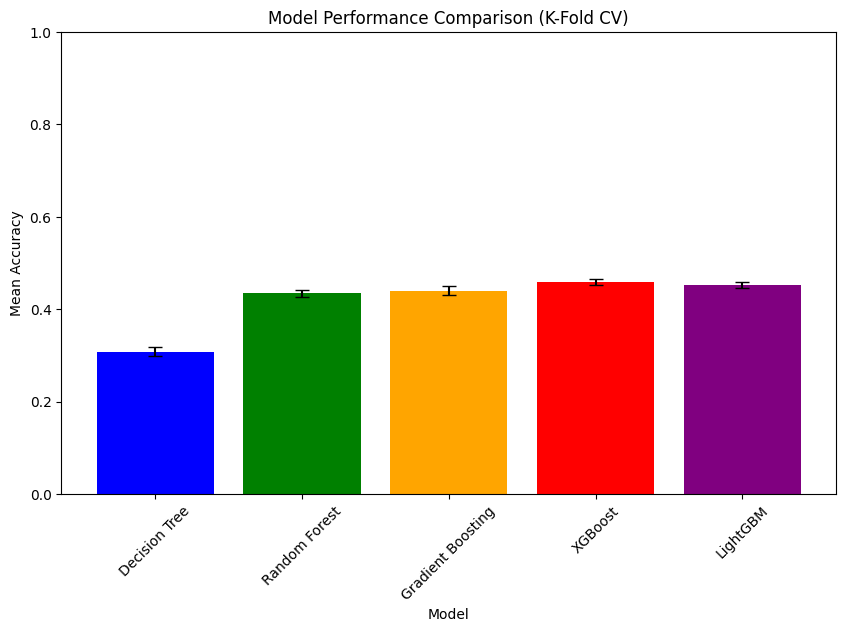

Prediction results saved to 'baseline_submission.csv' for XGBoost


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 모델 설정
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=CFG['SEED']),
    "Random Forest": RandomForestClassifier(random_state=CFG['SEED']),
    "Gradient Boosting": GradientBoostingClassifier(random_state=CFG['SEED']),
    "XGBoost": XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=CFG['SEED'])
}

# K-Fold 설정
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=CFG['SEED'])

# 결과 저장
results = {}

# K-Fold 교차 검증 수행
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    fold_accuracies = []

    # 교차 검증
    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_x, train_y), 1):
        # 학습 데이터와 검증 데이터 분리
        x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

        # 모델 학습
        model.fit(x_train, y_train)

        # 예측 및 평가
        preds = model.predict(x_val)
        acc = accuracy_score(y_val, preds)
        fold_accuracies.append(acc)

        print(f"  Fold {fold}: Accuracy = {acc:.4f}")

    # 결과 저장
    results[name] = {
        "mean_accuracy": np.mean(fold_accuracies),
        "std_accuracy": np.std(fold_accuracies),
        "accuracies": fold_accuracies
    }
    print(f"{name} Mean Accuracy = {np.mean(fold_accuracies):.4f}, Std = {np.std(fold_accuracies):.4f}")

# 전체 결과 요약
print("\nSummary of Model Performance:")
summary_df = pd.DataFrame({name: results[name] for name in results}).T
summary_df = summary_df[['mean_accuracy', 'std_accuracy']]
print(summary_df)

# 성능 시각화
means = summary_df['mean_accuracy']
stds = summary_df['std_accuracy']

plt.figure(figsize=(10, 6))
plt.bar(summary_df.index, means, yerr=stds, capsize=5, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Model Performance Comparison (K-Fold CV)")
plt.ylabel("Mean Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# 가장 성능 좋은 모델 선택 (Mean Accuracy 기준)
best_model_name = summary_df['mean_accuracy'].idxmax()
best_model = models[best_model_name]

# 선택된 모델로 test 데이터 예측
best_model.fit(train_x, train_y)  # 전체 학습 데이터로 학습
preds = best_model.predict(test_x)  # test 데이터에 대해 예측

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/baseline_submission.csv', index=False)

print(f"Prediction results saved to 'baseline_submission.csv' for {best_model_name}")


### XGBOOST hyperparameter tuning 결과 184등

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized_submission.csv'")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Cross-Validation Accuracy: 0.4647
Optimized predictions saved to 'optimized_submission.csv'


### iteration,cv 추가 200,10(175등)
### 4시간 소요

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=200, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized3_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized3_submission.csv'")


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Cross-Validation Accuracy: 0.4757
Optimized predictions saved to 'optimized3_submission.csv'


### iterations = 500,cv = 10




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=500, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized7_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized7_submission.csv'")


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


### 9시간(오히려 점수 떨어짐)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8,10],
    'n_estimators': [50, 100, 150, 200, 250,300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=300, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized4_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized4_submission.csv'")


Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Cross-Validation Accuracy: 0.4809
Optimized predictions saved to 'optimized4_submission.csv'


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=500, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized6_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized6_submission.csv'")


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


##lgbm modeling(개선 안 됨)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'num_leaves': [20, 31, 40, 50],  # LightGBM 전용
    'min_child_samples': [10, 20, 30],  # LightGBM 전용
}

# LightGBM 모델 정의
lgb_model = LGBMClassifier(random_state=CFG['SEED'])

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist,
                                   n_iter=500, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 LightGBM 모델 학습
best_lgb_model = random_search.best_estimator_
preds = best_lgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized_lgb_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized_lgb_submission.csv'")


Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 5001, number of used features: 32
[LightGBM] [Info] Start training from score -1.752354
[LightGBM] [Info] Start training from score -1.774513
[LightGBM] [Info] Start training from score -1.761624
[LightGBM] [Info] Start training from score -1.769807
[LightGBM] [Info] Start training from score -1.935368
[LightGBM] [Info] Start training from score -1.768634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

## 앙상블(처음 시도) 순위변화 없음

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 데이터 분리
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=CFG['SEED'])

# XGBoost 모델 정의
xgb_model = XGBClassifier(
    random_state=CFG['SEED'],
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=6,
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    min_child_weight=1
)

# LightGBM 모델 정의
lgbm_model = LGBMClassifier(
    random_state=CFG['SEED'],
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)

# Random Forest 모델 정의
rf_model = RandomForestClassifier(
    random_state=CFG['SEED'],
    n_estimators=100,
    max_depth=6
)

# Logistic Regression 모델 정의
logreg_model = LogisticRegression(random_state=CFG['SEED'], max_iter=1000)

# 앙상블 모델 정의 (Soft Voting 방식)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('logreg', logreg_model)
    ],
    voting='soft'  # 'soft': 확률 평균, 'hard': 다수결
)

# 앙상블 모델 학습
ensemble_model.fit(train_x, train_y)

# 검증 데이터에 대한 예측
val_preds = ensemble_model.predict(val_x)
val_accuracy = accuracy_score(val_y, val_preds)
print(f"Validation Accuracy (Ensemble Model): {val_accuracy:.4f}")

# 테스트 데이터에 대한 예측
test_preds = ensemble_model.predict(test_x)

# 결과 저장
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = test_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/ensemble_submission.csv', index=False)

print("Ensemble predictions saved to 'ensemble_submission.csv'")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 32
[LightGBM] [Info] Start training from score -1.731870
[LightGBM] [Info] Start training from score -1.751938
[LightGBM] [Info] Start training from score -1.795673
[LightGBM] [Info] Start training from score -1.777025
[LightGBM] [Info] Start training from score -1.967230
[LightGBM] [Info] Start training from score -1.745204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### 두 번째 시도(순위 변화 없)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 데이터 분리
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=CFG['SEED'])

# XGBoost 모델 정의
xgb_model = XGBClassifier(
    random_state=CFG['SEED'],
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=8,
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1
)

# LightGBM 모델 정의
lgbm_model = LGBMClassifier(
    random_state=CFG['SEED'],
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)

# Random Forest 모델 정의
rf_model = RandomForestClassifier(
    random_state=CFG['SEED'],
    n_estimators=100,
    max_depth=6
)

# Logistic Regression 모델 정의
logreg_model = LogisticRegression(random_state=CFG['SEED'], max_iter=1000)

# 앙상블 모델 정의 (Soft Voting 방식)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('logreg', logreg_model)
    ],
    voting='soft'  # 'soft': 확률 평균, 'hard': 다수결
)

# 앙상블 모델 학습
ensemble_model.fit(train_x, train_y)

# 검증 데이터에 대한 예측
val_preds = ensemble_model.predict(val_x)
val_accuracy = accuracy_score(val_y, val_preds)
print(f"Validation Accuracy (Ensemble Model): {val_accuracy:.4f}")

# 테스트 데이터에 대한 예측
test_preds = ensemble_model.predict(test_x)

# 결과 저장
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = test_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/ensemble_submission.csv', index=False)

print("Ensemble predictions saved to 'ensemble_submission.csv'")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 2048, number of used features: 32
[LightGBM] [Info] Start training from score -1.735741
[LightGBM] [Info] Start training from score -1.769547
[LightGBM] [Info] Start training from score -1.783977
[LightGBM] [Info] Start training from score -1.801573
[LightGBM] [Info] Start training from score -1.958192
[LightGBM] [Info] Start training from score -1.719257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### 세번째(순위 변화 없)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 데이터 분리
train_xx, val_xx, train_yy, val_yy = train_test_split(train_x, train_y, test_size=0.2, random_state=CFG['SEED'])

# XGBoost 모델 정의
xgb_model = XGBClassifier(
    random_state=CFG['SEED'],
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=8,
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0,
    min_child_weight=1
)

# LightGBM 모델 정의
lgbm_model = LGBMClassifier(
    random_state=CFG['SEED'],
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8
)

# Random Forest 모델 정의
rf_model = RandomForestClassifier(
    random_state=CFG['SEED'],
    n_estimators=100,
    max_depth=8
)

# Logistic Regression 모델 정의
logreg_model = LogisticRegression(random_state=CFG['SEED'], max_iter=1000)

# 앙상블 모델 정의 (Soft Voting 방식)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('logreg', logreg_model)
    ],
    voting='soft'  # 'soft': 확률 평균, 'hard': 다수결
)

# 앙상블 모델 학습
ensemble_model.fit(train_xx, train_yy)

# 검증 데이터에 대한 예측
val_preds = ensemble_model.predict(val_xx)
val_accuracy = accuracy_score(val_yy, val_preds)
print(f"Validation Accuracy (Ensemble Model): {val_accuracy:.4f}")

# 테스트 데이터에 대한 예측
test_preds = ensemble_model.predict(test_x)

# 결과 저장
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = test_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/ensemble_submission.csv', index=False)

print("Ensemble predictions saved to 'ensemble_submission.csv'")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 32
[LightGBM] [Info] Start training from score -1.730194
[LightGBM] [Info] Start training from score -1.755910
[LightGBM] [Info] Start training from score -1.767555
[LightGBM] [Info] Start training from score -1.767555
[LightGBM] [Info] Start training from score -1.973281
[LightGBM] [Info] Start training from score -1.774902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### 앙상블(많은 모델) -> 자꾸 오류

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# 데이터 스케일링 추가
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# 데이터 분리
train_xx, val_xx, train_yy, val_yy = train_test_split(
    train_x_scaled, train_y, test_size=0.2, random_state=CFG['SEED']
)

# 개별 모델 및 하이퍼파라미터 튜닝
## XGBoost
xgb_params = {
    'max_depth': [3, 5, 8, 10],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}
xgb_model = RandomizedSearchCV(
    XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss'),
    param_distributions=xgb_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=CFG['SEED'],
    n_jobs=-1
)
xgb_model.fit(train_x_scaled, train_y)
best_xgb_model = xgb_model.best_estimator_

## LightGBM
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'num_leaves': [15, 31, 63, 127]
}
lgbm_model = RandomizedSearchCV(
    LGBMClassifier(random_state=CFG['SEED']),
    param_distributions=lgbm_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=CFG['SEED'],
    n_jobs=-1
)
lgbm_model.fit(train_x_scaled, train_y)
best_lgbm_model = lgbm_model.best_estimator_

## Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomizedSearchCV(
    RandomForestClassifier(random_state=CFG['SEED']),
    param_distributions=rf_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=CFG['SEED'],
    n_jobs=-1
)
rf_model.fit(train_x_scaled, train_y)
best_rf_model = rf_model.best_estimator_

## Gradient Boosting
gbc_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}
gbc_model = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=CFG['SEED']),
    param_distributions=gbc_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=CFG['SEED'],
    n_jobs=-1
)
gbc_model.fit(train_x_scaled, train_y)
best_gbc_model = gbc_model.best_estimator_

## Support Vector Classifier (SVC)
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc_model = RandomizedSearchCV(
    SVC(probability=True, random_state=CFG['SEED']),
    param_distributions=svc_params,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=CFG['SEED'],
    n_jobs=-1
)
svc_model.fit(train_x_scaled, train_y)
best_svc_model = svc_model.best_estimator_

# 앙상블 모델 정의
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb_model),
        ('lgbm', best_lgbm_model),
        ('rf', best_rf_model),
        ('gbc', best_gbc_model),
        ('svc', best_svc_model)
    ],
    voting='soft'  # 확률 평균
)

# 앙상블 모델 학습
ensemble_model.fit(train_xx, train_yy)

# 검증 데이터에 대한 예측
val_preds = ensemble_model.predict(val_xx)
val_accuracy = accuracy_score(val_yy, val_preds)
print(f"Validation Accuracy (Ensemble Model): {val_accuracy:.4f}")

# 교차 검증 점수 계산
cv_scores = cross_val_score(ensemble_model, train_x_scaled, train_y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 테스트 데이터에 대한 예측
test_preds = ensemble_model.predict(test_x_scaled)

# 결과 저장
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = test_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/ensemble_optimized_submission.csv', index=False)

print("Ensemble predictions saved to 'ensemble_optimized_submission.csv'")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 5001, number of used features: 32
[LightGBM] [Info] Start training from score -1.752354
[LightGBM] [Info] Start training from score -1.774513
[LightGBM] [Info] Start training from score -1.761624
[LightGBM] [Info] Start training from score -1.769807
[LightGBM] [Info] Start training from score -1.935368
[LightGBM] [Info] Start training from score -1.768634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### 다른 앙상블

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Data Scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=20)  # 상위 20개 변수 선택
train_x_selected = selector.fit_transform(train_x_scaled, train_y)
test_x_selected = selector.transform(test_x_scaled)

# 데이터 분리
train_x_split, val_x, train_y_split, val_y = train_test_split(
    train_x_selected, train_y, test_size=0.2, random_state=CFG['SEED']
)

# SMOTE로 데이터 증강
smote = SMOTE(random_state=CFG['SEED'])
train_x_smote, train_y_smote = smote.fit_resample(train_x_split, train_y_split)

# XGBoost 하이퍼파라미터 튜닝
xgb_param_dist = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=500,
    cv=10,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=CFG['SEED']
)

random_search.fit(train_x_smote, train_y_smote)

# 최적의 XGBoost 모델
best_xgb_model = random_search.best_estimator_

# LightGBM 모델
lgbm_model = LGBMClassifier(
    random_state=CFG['SEED'],
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7
)

# Random Forest 모델
rf_model = RandomForestClassifier(
    random_state=CFG['SEED'],
    n_estimators=150,
    max_depth=7
)

# Logistic Regression 모델
logreg_model = LogisticRegression(
    random_state=CFG['SEED'],
    max_iter=1000
)

# Voting Ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('logreg', logreg_model)
    ],
    voting='soft'
)

# 앙상블 학습
ensemble_model.fit(train_x_smote, train_y_smote)

# 검증 데이터 예측
val_preds = ensemble_model.predict(val_x)
val_accuracy = accuracy_score(val_y, val_preds)
print(f"Validation Accuracy (Ensemble Model): {val_accuracy:.4f}")

# 테스트 데이터 예측
test_preds = ensemble_model.predict(test_x_selected)

# 결과 저장
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = test_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/ensemble_optimized_submission3.csv', index=False)

print("Optimized predictions saved to 'ensemble_optimized_submission3.csv'")


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


## Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 데이터 분리 (테스트 데이터가 있는 경우 분리 유지)
train_xx, val_xx, train_yy, val_yy = train_test_split(train_x, train_y, test_size=0.2, random_state=CFG['SEED'])

# GMM 모델 정의 및 학습
n_components = len(np.unique(train_yy))  # 클래스 개수
gmm_model = GaussianMixture(n_components=n_components, covariance_type='full', random_state=CFG['SEED'])

# GMM 모델 학습
gmm_model.fit(train_xx)

# 검증 데이터에 대한 예측
val_preds = gmm_model.predict(val_xx)

# 검증 데이터에서 클래스 레이블과 매핑 (GMM은 클러스터 번호를 반환하므로, 클래스와 매핑 필요)
from scipy.stats import mode

# 각 클러스터와 실제 레이블을 매핑
labels_map = {}
for i in range(n_components):
    mask = (val_preds == i)
    if np.any(mask):  # 클러스터에 데이터가 있을 경우
        labels_map[i] = mode(val_yy[mask])[0][0]  # 해당 클러스터의 최빈 레이블

# 클러스터 번호를 실제 레이블로 변환
mapped_preds = np.array([labels_map[cluster] for cluster in val_preds])

# 검증 정확도 계산
val_accuracy = accuracy_score(val_yy, mapped_preds)
print(f"Validation Accuracy (GMM Model): {val_accuracy:.4f}")

# 테스트 데이터에 대한 예측
test_preds = gmm_model.predict(test_x)

# 테스트 예측도 매핑 적용
test_mapped_preds = np.array([labels_map[cluster] for cluster in test_preds])

# 결과 저장
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = test_mapped_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/gmm_submission.csv', index=False)

print("Predictions saved to 'gmm_submission.csv'")


## 개선된 모델(점수 더 낮음 폐기)


In [ ]:
!pip install --upgrade xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

2.1.2


In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

# 하이퍼파라미터 최적화를 위한 objective 함수
def objective(trial):
    # 하이퍼파라미터 설정
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': CFG['SEED'],
        'eval_metric': 'mlogloss' if len(np.unique(train_y)) > 2 else 'logloss',
        'use_label_encoder': False,
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 100),
        'objective': 'multi:softmax' if len(np.unique(train_y)) > 2 else 'binary:logistic',
        'num_class': len(np.unique(train_y))  # 다중 클래스일 경우 클래스 수 지정
    }

    model = XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=CFG['SEED'])
    scores = []

    for train_idx, val_idx in skf.split(train_x, train_y):
        x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)])
        preds = model.predict(x_val)
        scores.append(accuracy_score(y_val, preds))

    return np.mean(scores)

# Optuna 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 최적의 하이퍼파라미터
best_params = study.best_params
print("Best parameters:", best_params)

# 최적의 하이퍼파라미터로 모델 생성 (early stopping 비활성화)
best_model = XGBClassifier(
    **{k: v for k, v in best_params.items() if k != "early_stopping_rounds"},  # early_stopping_rounds 제거
    random_state=CFG['SEED'],
    eval_metric='mlogloss' if len(np.unique(train_y)) > 2 else 'logloss',
    use_label_encoder=False
)

# Feature Selection (early stopping 없이)
feature_selector = SelectFromModel(best_model)
feature_selector.fit(train_x, train_y)  # early stopping 제거된 모델로 학습
selected_features = feature_selector.transform(train_x)

# 교차 검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=CFG['SEED'])
cv_scores = []

for train_idx, val_idx in skf.split(selected_features, train_y):
    x_train, x_val = selected_features[train_idx], selected_features[val_idx]
    y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    # 새로운 모델 생성 (early_stopping_rounds는 fit 단계에서 전달)
    temp_model = XGBClassifier(
        **{k: v for k, v in best_params.items() if k != "early_stopping_rounds"},
        random_state=CFG['SEED'],
        eval_metric='mlogloss' if len(np.unique(train_y)) > 2 else 'logloss',
        use_label_encoder=False
    )

    # 모델 학습
    temp_model.fit(
        x_train, y_train,
        eval_set=[(x_val, y_val)]
    )

    # 예측 및 점수 계산
    preds = temp_model.predict(x_val)
    cv_scores.append(accuracy_score(y_val, preds))

# 최종 결과 출력
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


# Feature Selection 적용
test_x_selected = feature_selector.transform(test_x)


# 테스트 데이터에 대해 최종 예측
best_model.fit(selected_features, train_y)  # 전체 학습 데이터로 최종 모델 학습
final_preds = best_model.predict(test_x_selected)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')

# 예측 값의 길이가 제출 파일과 일치하는지 확인
if len(final_preds) != len(submission):
    raise ValueError(
        f"Length mismatch: Predictions ({len(final_preds)}) vs Submission rows ({len(submission)})"
    )

submission['label'] = final_preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized2_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized2_submission.csv'")


[I 2024-11-21 10:08:34,885] A new study created in memory with name: no-name-a48d140e-a367-4e21-928e-383839d687c9


[0]	validation_0-mlogloss:1.78409
[1]	validation_0-mlogloss:1.77542
[2]	validation_0-mlogloss:1.76884
[3]	validation_0-mlogloss:1.76269
[4]	validation_0-mlogloss:1.75640
[5]	validation_0-mlogloss:1.74822
[6]	validation_0-mlogloss:1.74284
[7]	validation_0-mlogloss:1.73708
[8]	validation_0-mlogloss:1.72972
[9]	validation_0-mlogloss:1.72321
[10]	validation_0-mlogloss:1.71823
[11]	validation_0-mlogloss:1.71190
[12]	validation_0-mlogloss:1.70531
[13]	validation_0-mlogloss:1.69843
[14]	validation_0-mlogloss:1.69335
[15]	validation_0-mlogloss:1.68743
[16]	validation_0-mlogloss:1.68094
[17]	validation_0-mlogloss:1.67572
[18]	validation_0-mlogloss:1.67059
[19]	validation_0-mlogloss:1.66574
[20]	validation_0-mlogloss:1.66080
[21]	validation_0-mlogloss:1.65532
[22]	validation_0-mlogloss:1.65118
[23]	validation_0-mlogloss:1.64672
[24]	validation_0-mlogloss:1.64147
[25]	validation_0-mlogloss:1.63716
[26]	validation_0-mlogloss:1.63339
[27]	validation_0-mlogloss:1.62854
[28]	validation_0-mlogloss:1.6

[I 2024-11-21 10:10:14,137] Trial 0 finished with value: 0.46410809190809194 and parameters: {'max_depth': 9, 'n_estimators': 284, 'learning_rate': 0.020794815486523968, 'subsample': 0.7517983970183589, 'colsample_bytree': 0.5212772962656214, 'gamma': 0.759467790805563, 'min_child_weight': 8, 'early_stopping_rounds': 92}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.78348
[1]	validation_0-mlogloss:1.77521
[2]	validation_0-mlogloss:1.76791
[3]	validation_0-mlogloss:1.76006
[4]	validation_0-mlogloss:1.75273
[5]	validation_0-mlogloss:1.74551
[6]	validation_0-mlogloss:1.73840
[7]	validation_0-mlogloss:1.73153
[8]	validation_0-mlogloss:1.72508
[9]	validation_0-mlogloss:1.71860
[10]	validation_0-mlogloss:1.71202
[11]	validation_0-mlogloss:1.70571
[12]	validation_0-mlogloss:1.69962
[13]	validation_0-mlogloss:1.69341
[14]	validation_0-mlogloss:1.68763
[15]	validation_0-mlogloss:1.68231
[16]	validation_0-mlogloss:1.67671
[17]	validation_0-mlogloss:1.67127
[18]	validation_0-mlogloss:1.66605
[19]	validation_0-mlogloss:1.66105
[20]	validation_0-mlogloss:1.65624
[21]	validation_0-mlogloss:1.65134
[22]	validation_0-mlogloss:1.64661
[23]	validation_0-mlogloss:1.64165
[24]	validation_0-mlogloss:1.63727
[25]	validation_0-mlogloss:1.63264
[26]	validation_0-mlogloss:1.62815
[27]	validation_0-mlogloss:1.62406
[28]	validation_0-mlogloss:1.6

[I 2024-11-21 10:12:01,463] Trial 1 finished with value: 0.4555106893106893 and parameters: {'max_depth': 9, 'n_estimators': 249, 'learning_rate': 0.016829914244610562, 'subsample': 0.897423362428491, 'colsample_bytree': 0.9561032372770808, 'gamma': 2.309250670845059, 'min_child_weight': 2, 'early_stopping_rounds': 27}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.72020
[1]	validation_0-mlogloss:1.66215
[2]	validation_0-mlogloss:1.62222
[3]	validation_0-mlogloss:1.58503
[4]	validation_0-mlogloss:1.55205
[5]	validation_0-mlogloss:1.52369
[6]	validation_0-mlogloss:1.50763
[7]	validation_0-mlogloss:1.49384
[8]	validation_0-mlogloss:1.47891
[9]	validation_0-mlogloss:1.46953
[10]	validation_0-mlogloss:1.46344
[11]	validation_0-mlogloss:1.45309
[12]	validation_0-mlogloss:1.44578
[13]	validation_0-mlogloss:1.43751
[14]	validation_0-mlogloss:1.42921
[15]	validation_0-mlogloss:1.42437
[16]	validation_0-mlogloss:1.41871
[17]	validation_0-mlogloss:1.41482
[18]	validation_0-mlogloss:1.41219
[19]	validation_0-mlogloss:1.40830
[20]	validation_0-mlogloss:1.40509
[21]	validation_0-mlogloss:1.40209
[22]	validation_0-mlogloss:1.40070
[23]	validation_0-mlogloss:1.39695
[24]	validation_0-mlogloss:1.39505
[25]	validation_0-mlogloss:1.39433
[26]	validation_0-mlogloss:1.39139
[27]	validation_0-mlogloss:1.39084
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:12:11,379] Trial 2 finished with value: 0.44271468531468533 and parameters: {'max_depth': 5, 'n_estimators': 63, 'learning_rate': 0.2069981331367213, 'subsample': 0.9290544860120474, 'colsample_bytree': 0.644967289787324, 'gamma': 2.580471513196247, 'min_child_weight': 5, 'early_stopping_rounds': 16}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.67990
[1]	validation_0-mlogloss:1.60548
[2]	validation_0-mlogloss:1.55637
[3]	validation_0-mlogloss:1.52077
[4]	validation_0-mlogloss:1.49303
[5]	validation_0-mlogloss:1.47417
[6]	validation_0-mlogloss:1.46113
[7]	validation_0-mlogloss:1.44584
[8]	validation_0-mlogloss:1.43796
[9]	validation_0-mlogloss:1.43070
[10]	validation_0-mlogloss:1.42440
[11]	validation_0-mlogloss:1.41834
[12]	validation_0-mlogloss:1.41270
[13]	validation_0-mlogloss:1.40824
[14]	validation_0-mlogloss:1.40629
[15]	validation_0-mlogloss:1.40520
[16]	validation_0-mlogloss:1.40345
[17]	validation_0-mlogloss:1.40214
[18]	validation_0-mlogloss:1.40159
[19]	validation_0-mlogloss:1.40035
[20]	validation_0-mlogloss:1.40094
[21]	validation_0-mlogloss:1.39946
[22]	validation_0-mlogloss:1.39845
[23]	validation_0-mlogloss:1.39794
[24]	validation_0-mlogloss:1.39764
[25]	validation_0-mlogloss:1.39789
[26]	validation_0-mlogloss:1.39787
[27]	validation_0-mlogloss:1.39784
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:12:30,807] Trial 3 finished with value: 0.42831448551448553 and parameters: {'max_depth': 9, 'n_estimators': 195, 'learning_rate': 0.2855217267379986, 'subsample': 0.8116798990465774, 'colsample_bytree': 0.8554205940889487, 'gamma': 4.304706469746181, 'min_child_weight': 6, 'early_stopping_rounds': 67}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.77302
[1]	validation_0-mlogloss:1.75554
[2]	validation_0-mlogloss:1.74072
[3]	validation_0-mlogloss:1.72594
[4]	validation_0-mlogloss:1.71241
[5]	validation_0-mlogloss:1.69880
[6]	validation_0-mlogloss:1.68715
[7]	validation_0-mlogloss:1.67599
[8]	validation_0-mlogloss:1.66517
[9]	validation_0-mlogloss:1.65497
[10]	validation_0-mlogloss:1.64505
[11]	validation_0-mlogloss:1.63552
[12]	validation_0-mlogloss:1.62582
[13]	validation_0-mlogloss:1.61734
[14]	validation_0-mlogloss:1.60918
[15]	validation_0-mlogloss:1.60131
[16]	validation_0-mlogloss:1.59382
[17]	validation_0-mlogloss:1.58719
[18]	validation_0-mlogloss:1.58031
[19]	validation_0-mlogloss:1.57426
[20]	validation_0-mlogloss:1.56802
[21]	validation_0-mlogloss:1.56181
[22]	validation_0-mlogloss:1.55584
[23]	validation_0-mlogloss:1.54998
[24]	validation_0-mlogloss:1.54469
[25]	validation_0-mlogloss:1.53969
[26]	validation_0-mlogloss:1.53531
[27]	validation_0-mlogloss:1.53067
[28]	validation_0-mlogloss:1.5

[I 2024-11-21 10:13:05,434] Trial 4 finished with value: 0.4499116883116884 and parameters: {'max_depth': 3, 'n_estimators': 227, 'learning_rate': 0.04686914472824011, 'subsample': 0.7967067695169892, 'colsample_bytree': 0.9550284693150453, 'gamma': 1.1076088360273633, 'min_child_weight': 1, 'early_stopping_rounds': 84}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.73656
[1]	validation_0-mlogloss:1.68736
[2]	validation_0-mlogloss:1.65071
[3]	validation_0-mlogloss:1.61896
[4]	validation_0-mlogloss:1.59009
[5]	validation_0-mlogloss:1.56253
[6]	validation_0-mlogloss:1.54491
[7]	validation_0-mlogloss:1.52951
[8]	validation_0-mlogloss:1.51669
[9]	validation_0-mlogloss:1.49857
[10]	validation_0-mlogloss:1.48505
[11]	validation_0-mlogloss:1.47402
[12]	validation_0-mlogloss:1.46230
[13]	validation_0-mlogloss:1.45518
[14]	validation_0-mlogloss:1.44739
[15]	validation_0-mlogloss:1.43832
[16]	validation_0-mlogloss:1.43095
[17]	validation_0-mlogloss:1.42499
[18]	validation_0-mlogloss:1.41924
[19]	validation_0-mlogloss:1.41486
[20]	validation_0-mlogloss:1.41034
[21]	validation_0-mlogloss:1.40629
[22]	validation_0-mlogloss:1.40316
[23]	validation_0-mlogloss:1.39671
[24]	validation_0-mlogloss:1.39326
[25]	validation_0-mlogloss:1.39110
[26]	validation_0-mlogloss:1.39003
[27]	validation_0-mlogloss:1.38686
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:13:26,054] Trial 5 finished with value: 0.4551078921078921 and parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.1622960118567141, 'subsample': 0.5257508647252531, 'colsample_bytree': 0.7014694893055546, 'gamma': 0.3081972562950053, 'min_child_weight': 2, 'early_stopping_rounds': 16}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.76058
[1]	validation_0-mlogloss:1.72474
[2]	validation_0-mlogloss:1.69744
[3]	validation_0-mlogloss:1.67192
[4]	validation_0-mlogloss:1.64835
[5]	validation_0-mlogloss:1.62384
[6]	validation_0-mlogloss:1.60867
[7]	validation_0-mlogloss:1.59112
[8]	validation_0-mlogloss:1.57531
[9]	validation_0-mlogloss:1.56129
[10]	validation_0-mlogloss:1.55137
[11]	validation_0-mlogloss:1.53701
[12]	validation_0-mlogloss:1.52383
[13]	validation_0-mlogloss:1.51165
[14]	validation_0-mlogloss:1.50278
[15]	validation_0-mlogloss:1.49290
[16]	validation_0-mlogloss:1.48293
[17]	validation_0-mlogloss:1.47584
[18]	validation_0-mlogloss:1.46936
[19]	validation_0-mlogloss:1.46041
[20]	validation_0-mlogloss:1.45341
[21]	validation_0-mlogloss:1.44530
[22]	validation_0-mlogloss:1.43807
[23]	validation_0-mlogloss:1.43210
[24]	validation_0-mlogloss:1.42654
[25]	validation_0-mlogloss:1.42100
[26]	validation_0-mlogloss:1.41434
[27]	validation_0-mlogloss:1.41002
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:14:05,196] Trial 6 finished with value: 0.4543092907092907 and parameters: {'max_depth': 9, 'n_estimators': 276, 'learning_rate': 0.08672361727836048, 'subsample': 0.8461801590664515, 'colsample_bytree': 0.6310043982076068, 'gamma': 1.8131122264359845, 'min_child_weight': 4, 'early_stopping_rounds': 39}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.74527
[1]	validation_0-mlogloss:1.70219
[2]	validation_0-mlogloss:1.67311
[3]	validation_0-mlogloss:1.64534
[4]	validation_0-mlogloss:1.61983
[5]	validation_0-mlogloss:1.59670
[6]	validation_0-mlogloss:1.57984
[7]	validation_0-mlogloss:1.56631
[8]	validation_0-mlogloss:1.55067
[9]	validation_0-mlogloss:1.53664
[10]	validation_0-mlogloss:1.52455
[11]	validation_0-mlogloss:1.51343
[12]	validation_0-mlogloss:1.50409
[13]	validation_0-mlogloss:1.49463
[14]	validation_0-mlogloss:1.48644
[15]	validation_0-mlogloss:1.47859
[16]	validation_0-mlogloss:1.47073
[17]	validation_0-mlogloss:1.46407
[18]	validation_0-mlogloss:1.46031
[19]	validation_0-mlogloss:1.45409
[20]	validation_0-mlogloss:1.44890
[21]	validation_0-mlogloss:1.44354
[22]	validation_0-mlogloss:1.43991
[23]	validation_0-mlogloss:1.43585
[24]	validation_0-mlogloss:1.43209
[25]	validation_0-mlogloss:1.43027
[26]	validation_0-mlogloss:1.42787
[27]	validation_0-mlogloss:1.42335
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:14:17,819] Trial 7 finished with value: 0.44251328671328666 and parameters: {'max_depth': 3, 'n_estimators': 90, 'learning_rate': 0.13254318809727098, 'subsample': 0.87497583440215, 'colsample_bytree': 0.7620079159119051, 'gamma': 3.405143083963199, 'min_child_weight': 4, 'early_stopping_rounds': 56}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.78285
[1]	validation_0-mlogloss:1.77398
[2]	validation_0-mlogloss:1.76630
[3]	validation_0-mlogloss:1.75842
[4]	validation_0-mlogloss:1.75097
[5]	validation_0-mlogloss:1.74321
[6]	validation_0-mlogloss:1.73608
[7]	validation_0-mlogloss:1.72931
[8]	validation_0-mlogloss:1.72256
[9]	validation_0-mlogloss:1.71571
[10]	validation_0-mlogloss:1.70953
[11]	validation_0-mlogloss:1.70313
[12]	validation_0-mlogloss:1.69668
[13]	validation_0-mlogloss:1.69047
[14]	validation_0-mlogloss:1.68472
[15]	validation_0-mlogloss:1.67892
[16]	validation_0-mlogloss:1.67332
[17]	validation_0-mlogloss:1.66799
[18]	validation_0-mlogloss:1.66254
[19]	validation_0-mlogloss:1.65742
[20]	validation_0-mlogloss:1.65242
[21]	validation_0-mlogloss:1.64753
[22]	validation_0-mlogloss:1.64247
[23]	validation_0-mlogloss:1.63733
[24]	validation_0-mlogloss:1.63262
[25]	validation_0-mlogloss:1.62838
[26]	validation_0-mlogloss:1.62394
[27]	validation_0-mlogloss:1.61957
[28]	validation_0-mlogloss:1.6

[I 2024-11-21 10:14:30,229] Trial 8 finished with value: 0.43191568431568433 and parameters: {'max_depth': 4, 'n_estimators': 66, 'learning_rate': 0.021515945266160838, 'subsample': 0.7444511947266217, 'colsample_bytree': 0.8462997549448146, 'gamma': 2.2273243129959166, 'min_child_weight': 9, 'early_stopping_rounds': 14}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.74179
[1]	validation_0-mlogloss:1.69430
[2]	validation_0-mlogloss:1.66037
[3]	validation_0-mlogloss:1.63014
[4]	validation_0-mlogloss:1.60371
[5]	validation_0-mlogloss:1.57905
[6]	validation_0-mlogloss:1.56050
[7]	validation_0-mlogloss:1.54297
[8]	validation_0-mlogloss:1.52332
[9]	validation_0-mlogloss:1.50785
[10]	validation_0-mlogloss:1.49216
[11]	validation_0-mlogloss:1.47786
[12]	validation_0-mlogloss:1.46466
[13]	validation_0-mlogloss:1.45318
[14]	validation_0-mlogloss:1.44320
[15]	validation_0-mlogloss:1.43441
[16]	validation_0-mlogloss:1.42515
[17]	validation_0-mlogloss:1.41691
[18]	validation_0-mlogloss:1.41155
[19]	validation_0-mlogloss:1.40429
[20]	validation_0-mlogloss:1.39690
[21]	validation_0-mlogloss:1.39114
[22]	validation_0-mlogloss:1.38683
[23]	validation_0-mlogloss:1.38224
[24]	validation_0-mlogloss:1.37930
[25]	validation_0-mlogloss:1.37476
[26]	validation_0-mlogloss:1.37043
[27]	validation_0-mlogloss:1.36806
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:15:19,332] Trial 9 finished with value: 0.46410629370629375 and parameters: {'max_depth': 8, 'n_estimators': 189, 'learning_rate': 0.12677380667054003, 'subsample': 0.8055525345260942, 'colsample_bytree': 0.6890404781550283, 'gamma': 0.41263879194283315, 'min_child_weight': 2, 'early_stopping_rounds': 92}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.72308
[1]	validation_0-mlogloss:1.66129
[2]	validation_0-mlogloss:1.62228
[3]	validation_0-mlogloss:1.58883
[4]	validation_0-mlogloss:1.55711
[5]	validation_0-mlogloss:1.52807
[6]	validation_0-mlogloss:1.51159
[7]	validation_0-mlogloss:1.49155
[8]	validation_0-mlogloss:1.47219
[9]	validation_0-mlogloss:1.46027
[10]	validation_0-mlogloss:1.45250
[11]	validation_0-mlogloss:1.43874
[12]	validation_0-mlogloss:1.42515
[13]	validation_0-mlogloss:1.42065
[14]	validation_0-mlogloss:1.41396
[15]	validation_0-mlogloss:1.40555
[16]	validation_0-mlogloss:1.40253
[17]	validation_0-mlogloss:1.39790
[18]	validation_0-mlogloss:1.39612
[19]	validation_0-mlogloss:1.39141
[20]	validation_0-mlogloss:1.39003
[21]	validation_0-mlogloss:1.38602
[22]	validation_0-mlogloss:1.38328
[23]	validation_0-mlogloss:1.37692
[24]	validation_0-mlogloss:1.37414
[25]	validation_0-mlogloss:1.37342
[26]	validation_0-mlogloss:1.37131
[27]	validation_0-mlogloss:1.36965
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:15:43,502] Trial 10 finished with value: 0.4565094905094905 and parameters: {'max_depth': 7, 'n_estimators': 294, 'learning_rate': 0.2272326919787519, 'subsample': 0.6459678358814176, 'colsample_bytree': 0.5042016576205698, 'gamma': 1.1304490916943621, 'min_child_weight': 10, 'early_stopping_rounds': 100}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.75495
[1]	validation_0-mlogloss:1.71714
[2]	validation_0-mlogloss:1.69375
[3]	validation_0-mlogloss:1.67368
[4]	validation_0-mlogloss:1.65242
[5]	validation_0-mlogloss:1.62654
[6]	validation_0-mlogloss:1.61075
[7]	validation_0-mlogloss:1.59275
[8]	validation_0-mlogloss:1.57567
[9]	validation_0-mlogloss:1.55996
[10]	validation_0-mlogloss:1.54998
[11]	validation_0-mlogloss:1.53677
[12]	validation_0-mlogloss:1.52168
[13]	validation_0-mlogloss:1.50957
[14]	validation_0-mlogloss:1.50140
[15]	validation_0-mlogloss:1.48995
[16]	validation_0-mlogloss:1.48075
[17]	validation_0-mlogloss:1.47230
[18]	validation_0-mlogloss:1.46460
[19]	validation_0-mlogloss:1.45773
[20]	validation_0-mlogloss:1.45172
[21]	validation_0-mlogloss:1.44517
[22]	validation_0-mlogloss:1.44039
[23]	validation_0-mlogloss:1.43383
[24]	validation_0-mlogloss:1.42900
[25]	validation_0-mlogloss:1.42372
[26]	validation_0-mlogloss:1.41899
[27]	validation_0-mlogloss:1.41650
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:16:21,244] Trial 11 finished with value: 0.4555090909090909 and parameters: {'max_depth': 7, 'n_estimators': 145, 'learning_rate': 0.10409949926307699, 'subsample': 0.688773111987283, 'colsample_bytree': 0.5076097838543158, 'gamma': 0.06036256144701024, 'min_child_weight': 8, 'early_stopping_rounds': 99}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.76272
[1]	validation_0-mlogloss:1.73283
[2]	validation_0-mlogloss:1.70893
[3]	validation_0-mlogloss:1.68702
[4]	validation_0-mlogloss:1.66678
[5]	validation_0-mlogloss:1.64367
[6]	validation_0-mlogloss:1.62879
[7]	validation_0-mlogloss:1.61649
[8]	validation_0-mlogloss:1.60172
[9]	validation_0-mlogloss:1.58742
[10]	validation_0-mlogloss:1.57664
[11]	validation_0-mlogloss:1.56335
[12]	validation_0-mlogloss:1.55113
[13]	validation_0-mlogloss:1.53769
[14]	validation_0-mlogloss:1.52646
[15]	validation_0-mlogloss:1.51723
[16]	validation_0-mlogloss:1.50776
[17]	validation_0-mlogloss:1.49986
[18]	validation_0-mlogloss:1.49244
[19]	validation_0-mlogloss:1.48465
[20]	validation_0-mlogloss:1.47611
[21]	validation_0-mlogloss:1.46552
[22]	validation_0-mlogloss:1.45921
[23]	validation_0-mlogloss:1.45508
[24]	validation_0-mlogloss:1.44845
[25]	validation_0-mlogloss:1.44208
[26]	validation_0-mlogloss:1.43800
[27]	validation_0-mlogloss:1.43343
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:17:07,666] Trial 12 finished with value: 0.4583084915084915 and parameters: {'max_depth': 10, 'n_estimators': 201, 'learning_rate': 0.07550748585375971, 'subsample': 0.9777303981262324, 'colsample_bytree': 0.5783546716034754, 'gamma': 0.8866696541521918, 'min_child_weight': 7, 'early_stopping_rounds': 80}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.72517
[1]	validation_0-mlogloss:1.67232
[2]	validation_0-mlogloss:1.63130
[3]	validation_0-mlogloss:1.59692
[4]	validation_0-mlogloss:1.56579
[5]	validation_0-mlogloss:1.54060
[6]	validation_0-mlogloss:1.51877
[7]	validation_0-mlogloss:1.50217
[8]	validation_0-mlogloss:1.48785
[9]	validation_0-mlogloss:1.47382
[10]	validation_0-mlogloss:1.45934
[11]	validation_0-mlogloss:1.44790
[12]	validation_0-mlogloss:1.43661
[13]	validation_0-mlogloss:1.43149
[14]	validation_0-mlogloss:1.42521
[15]	validation_0-mlogloss:1.41732
[16]	validation_0-mlogloss:1.41111
[17]	validation_0-mlogloss:1.40486
[18]	validation_0-mlogloss:1.39932
[19]	validation_0-mlogloss:1.39535
[20]	validation_0-mlogloss:1.39328
[21]	validation_0-mlogloss:1.38863
[22]	validation_0-mlogloss:1.38469
[23]	validation_0-mlogloss:1.38064
[24]	validation_0-mlogloss:1.37997
[25]	validation_0-mlogloss:1.37843
[26]	validation_0-mlogloss:1.37555
[27]	validation_0-mlogloss:1.37342
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:17:40,654] Trial 13 finished with value: 0.45570969030969033 and parameters: {'max_depth': 8, 'n_estimators': 120, 'learning_rate': 0.16774656634837937, 'subsample': 0.6326369258508457, 'colsample_bytree': 0.7607132589292505, 'gamma': 0.6232606679639486, 'min_child_weight': 7, 'early_stopping_rounds': 85}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.74546
[1]	validation_0-mlogloss:1.70472
[2]	validation_0-mlogloss:1.67323
[3]	validation_0-mlogloss:1.64703
[4]	validation_0-mlogloss:1.62185
[5]	validation_0-mlogloss:1.59603
[6]	validation_0-mlogloss:1.57932
[7]	validation_0-mlogloss:1.56299
[8]	validation_0-mlogloss:1.54588
[9]	validation_0-mlogloss:1.53231
[10]	validation_0-mlogloss:1.52078
[11]	validation_0-mlogloss:1.50522
[12]	validation_0-mlogloss:1.49213
[13]	validation_0-mlogloss:1.48051
[14]	validation_0-mlogloss:1.47232
[15]	validation_0-mlogloss:1.46130
[16]	validation_0-mlogloss:1.45413
[17]	validation_0-mlogloss:1.44644
[18]	validation_0-mlogloss:1.44052
[19]	validation_0-mlogloss:1.43273
[20]	validation_0-mlogloss:1.42763
[21]	validation_0-mlogloss:1.42140
[22]	validation_0-mlogloss:1.41698
[23]	validation_0-mlogloss:1.41181
[24]	validation_0-mlogloss:1.40766
[25]	validation_0-mlogloss:1.40319
[26]	validation_0-mlogloss:1.39929
[27]	validation_0-mlogloss:1.39703
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:18:21,877] Trial 14 finished with value: 0.46230829170829174 and parameters: {'max_depth': 6, 'n_estimators': 246, 'learning_rate': 0.12213562104968191, 'subsample': 0.7869399255392012, 'colsample_bytree': 0.5803008948417521, 'gamma': 1.5425482622777404, 'min_child_weight': 3, 'early_stopping_rounds': 73}. Best is trial 0 with value: 0.46410809190809194.


[0]	validation_0-mlogloss:1.77035
[1]	validation_0-mlogloss:1.74845
[2]	validation_0-mlogloss:1.72875
[3]	validation_0-mlogloss:1.70831
[4]	validation_0-mlogloss:1.69094
[5]	validation_0-mlogloss:1.67291
[6]	validation_0-mlogloss:1.66074
[7]	validation_0-mlogloss:1.64835
[8]	validation_0-mlogloss:1.63462
[9]	validation_0-mlogloss:1.62038
[10]	validation_0-mlogloss:1.60867
[11]	validation_0-mlogloss:1.59700
[12]	validation_0-mlogloss:1.58513
[13]	validation_0-mlogloss:1.57516
[14]	validation_0-mlogloss:1.56516
[15]	validation_0-mlogloss:1.55582
[16]	validation_0-mlogloss:1.54577
[17]	validation_0-mlogloss:1.53726
[18]	validation_0-mlogloss:1.52987
[19]	validation_0-mlogloss:1.52234
[20]	validation_0-mlogloss:1.51608
[21]	validation_0-mlogloss:1.50784
[22]	validation_0-mlogloss:1.50121
[23]	validation_0-mlogloss:1.49445
[24]	validation_0-mlogloss:1.48897
[25]	validation_0-mlogloss:1.48320
[26]	validation_0-mlogloss:1.47673
[27]	validation_0-mlogloss:1.47073
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:19:20,738] Trial 15 finished with value: 0.4649066933066933 and parameters: {'max_depth': 10, 'n_estimators': 171, 'learning_rate': 0.05845920315371615, 'subsample': 0.7106404260587834, 'colsample_bytree': 0.6869377989608464, 'gamma': 0.04432966760770185, 'min_child_weight': 10, 'early_stopping_rounds': 57}. Best is trial 15 with value: 0.4649066933066933.


[0]	validation_0-mlogloss:1.76629
[1]	validation_0-mlogloss:1.74140
[2]	validation_0-mlogloss:1.71953
[3]	validation_0-mlogloss:1.69966
[4]	validation_0-mlogloss:1.68134
[5]	validation_0-mlogloss:1.66392
[6]	validation_0-mlogloss:1.64895
[7]	validation_0-mlogloss:1.63402
[8]	validation_0-mlogloss:1.62052
[9]	validation_0-mlogloss:1.60686
[10]	validation_0-mlogloss:1.59543
[11]	validation_0-mlogloss:1.58471
[12]	validation_0-mlogloss:1.57192
[13]	validation_0-mlogloss:1.56051
[14]	validation_0-mlogloss:1.54908
[15]	validation_0-mlogloss:1.53957
[16]	validation_0-mlogloss:1.53146
[17]	validation_0-mlogloss:1.52405
[18]	validation_0-mlogloss:1.51508
[19]	validation_0-mlogloss:1.50768
[20]	validation_0-mlogloss:1.50030
[21]	validation_0-mlogloss:1.49303
[22]	validation_0-mlogloss:1.48553
[23]	validation_0-mlogloss:1.47843
[24]	validation_0-mlogloss:1.47281
[25]	validation_0-mlogloss:1.46667
[26]	validation_0-mlogloss:1.46133
[27]	validation_0-mlogloss:1.45635
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:20:26,240] Trial 16 finished with value: 0.46870869130869125 and parameters: {'max_depth': 10, 'n_estimators': 164, 'learning_rate': 0.05923797463477802, 'subsample': 0.707282836971509, 'colsample_bytree': 0.8199951938820276, 'gamma': 0.015438478992179663, 'min_child_weight': 10, 'early_stopping_rounds': 45}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.76655
[1]	validation_0-mlogloss:1.73995
[2]	validation_0-mlogloss:1.71868
[3]	validation_0-mlogloss:1.69724
[4]	validation_0-mlogloss:1.67785
[5]	validation_0-mlogloss:1.66027
[6]	validation_0-mlogloss:1.64531
[7]	validation_0-mlogloss:1.63231
[8]	validation_0-mlogloss:1.61821
[9]	validation_0-mlogloss:1.60548
[10]	validation_0-mlogloss:1.59250
[11]	validation_0-mlogloss:1.58095
[12]	validation_0-mlogloss:1.56826
[13]	validation_0-mlogloss:1.55657
[14]	validation_0-mlogloss:1.54740
[15]	validation_0-mlogloss:1.53892
[16]	validation_0-mlogloss:1.52975
[17]	validation_0-mlogloss:1.52216
[18]	validation_0-mlogloss:1.51363
[19]	validation_0-mlogloss:1.50592
[20]	validation_0-mlogloss:1.49893
[21]	validation_0-mlogloss:1.49180
[22]	validation_0-mlogloss:1.48458
[23]	validation_0-mlogloss:1.47733
[24]	validation_0-mlogloss:1.47078
[25]	validation_0-mlogloss:1.46515
[26]	validation_0-mlogloss:1.46056
[27]	validation_0-mlogloss:1.45665
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:21:18,316] Trial 17 finished with value: 0.4641050949050949 and parameters: {'max_depth': 10, 'n_estimators': 158, 'learning_rate': 0.06374824565060662, 'subsample': 0.5608844697222745, 'colsample_bytree': 0.8422330133944005, 'gamma': 0.005175015249718307, 'min_child_weight': 10, 'early_stopping_rounds': 47}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.77069
[1]	validation_0-mlogloss:1.75001
[2]	validation_0-mlogloss:1.73292
[3]	validation_0-mlogloss:1.71350
[4]	validation_0-mlogloss:1.69726
[5]	validation_0-mlogloss:1.68087
[6]	validation_0-mlogloss:1.66642
[7]	validation_0-mlogloss:1.65335
[8]	validation_0-mlogloss:1.63960
[9]	validation_0-mlogloss:1.62730
[10]	validation_0-mlogloss:1.61558
[11]	validation_0-mlogloss:1.60547
[12]	validation_0-mlogloss:1.59396
[13]	validation_0-mlogloss:1.58396
[14]	validation_0-mlogloss:1.57444
[15]	validation_0-mlogloss:1.56551
[16]	validation_0-mlogloss:1.55741
[17]	validation_0-mlogloss:1.54956
[18]	validation_0-mlogloss:1.54176
[19]	validation_0-mlogloss:1.53448
[20]	validation_0-mlogloss:1.52737
[21]	validation_0-mlogloss:1.52009
[22]	validation_0-mlogloss:1.51382
[23]	validation_0-mlogloss:1.50663
[24]	validation_0-mlogloss:1.50016
[25]	validation_0-mlogloss:1.49406
[26]	validation_0-mlogloss:1.48862
[27]	validation_0-mlogloss:1.48357
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:21:48,835] Trial 18 finished with value: 0.45650889110889115 and parameters: {'max_depth': 10, 'n_estimators': 120, 'learning_rate': 0.05170535600534988, 'subsample': 0.6955529989268436, 'colsample_bytree': 0.809912529087506, 'gamma': 2.937061520542223, 'min_child_weight': 9, 'early_stopping_rounds': 56}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.71803
[1]	validation_0-mlogloss:1.65840
[2]	validation_0-mlogloss:1.61745
[3]	validation_0-mlogloss:1.58369
[4]	validation_0-mlogloss:1.55289
[5]	validation_0-mlogloss:1.53015
[6]	validation_0-mlogloss:1.51202
[7]	validation_0-mlogloss:1.49522
[8]	validation_0-mlogloss:1.48051
[9]	validation_0-mlogloss:1.46848
[10]	validation_0-mlogloss:1.45840
[11]	validation_0-mlogloss:1.44875
[12]	validation_0-mlogloss:1.44262
[13]	validation_0-mlogloss:1.43636
[14]	validation_0-mlogloss:1.43109
[15]	validation_0-mlogloss:1.42524
[16]	validation_0-mlogloss:1.41964
[17]	validation_0-mlogloss:1.41757
[18]	validation_0-mlogloss:1.41447
[19]	validation_0-mlogloss:1.41264
[20]	validation_0-mlogloss:1.40994
[21]	validation_0-mlogloss:1.40688
[22]	validation_0-mlogloss:1.40437
[23]	validation_0-mlogloss:1.40266
[24]	validation_0-mlogloss:1.40200
[25]	validation_0-mlogloss:1.40138
[26]	validation_0-mlogloss:1.40015
[27]	validation_0-mlogloss:1.39915
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:22:05,552] Trial 19 finished with value: 0.4431116883116883 and parameters: {'max_depth': 8, 'n_estimators': 119, 'learning_rate': 0.19267147894008851, 'subsample': 0.597287000753466, 'colsample_bytree': 0.8968565867982102, 'gamma': 4.4754426709189445, 'min_child_weight': 10, 'early_stopping_rounds': 38}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.75541
[1]	validation_0-mlogloss:1.71891
[2]	validation_0-mlogloss:1.68973
[3]	validation_0-mlogloss:1.66417
[4]	validation_0-mlogloss:1.64065
[5]	validation_0-mlogloss:1.61976
[6]	validation_0-mlogloss:1.60258
[7]	validation_0-mlogloss:1.58870
[8]	validation_0-mlogloss:1.57189
[9]	validation_0-mlogloss:1.55744
[10]	validation_0-mlogloss:1.54431
[11]	validation_0-mlogloss:1.53246
[12]	validation_0-mlogloss:1.52153
[13]	validation_0-mlogloss:1.51210
[14]	validation_0-mlogloss:1.50240
[15]	validation_0-mlogloss:1.49406
[16]	validation_0-mlogloss:1.48707
[17]	validation_0-mlogloss:1.47996
[18]	validation_0-mlogloss:1.47484
[19]	validation_0-mlogloss:1.46818
[20]	validation_0-mlogloss:1.46275
[21]	validation_0-mlogloss:1.45664
[22]	validation_0-mlogloss:1.45216
[23]	validation_0-mlogloss:1.44683
[24]	validation_0-mlogloss:1.44321
[25]	validation_0-mlogloss:1.43841
[26]	validation_0-mlogloss:1.43380
[27]	validation_0-mlogloss:1.43006
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:22:32,449] Trial 20 finished with value: 0.4459114885114885 and parameters: {'max_depth': 6, 'n_estimators': 176, 'learning_rate': 0.10004259748579294, 'subsample': 0.7037827181417823, 'colsample_bytree': 0.708009024779061, 'gamma': 3.883004906786422, 'min_child_weight': 9, 'early_stopping_rounds': 66}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.77806
[1]	validation_0-mlogloss:1.76401
[2]	validation_0-mlogloss:1.75314
[3]	validation_0-mlogloss:1.74275
[4]	validation_0-mlogloss:1.73089
[5]	validation_0-mlogloss:1.71901
[6]	validation_0-mlogloss:1.71043
[7]	validation_0-mlogloss:1.70159
[8]	validation_0-mlogloss:1.69053
[9]	validation_0-mlogloss:1.68089
[10]	validation_0-mlogloss:1.67302
[11]	validation_0-mlogloss:1.66390
[12]	validation_0-mlogloss:1.65565
[13]	validation_0-mlogloss:1.64673
[14]	validation_0-mlogloss:1.64006
[15]	validation_0-mlogloss:1.63166
[16]	validation_0-mlogloss:1.62349
[17]	validation_0-mlogloss:1.61590
[18]	validation_0-mlogloss:1.60946
[19]	validation_0-mlogloss:1.60306
[20]	validation_0-mlogloss:1.59728
[21]	validation_0-mlogloss:1.59070
[22]	validation_0-mlogloss:1.58492
[23]	validation_0-mlogloss:1.57963
[24]	validation_0-mlogloss:1.57311
[25]	validation_0-mlogloss:1.56738
[26]	validation_0-mlogloss:1.56269
[27]	validation_0-mlogloss:1.55648
[28]	validation_0-mlogloss:1.5

[I 2024-11-21 10:23:56,315] Trial 21 finished with value: 0.46450889110889115 and parameters: {'max_depth': 10, 'n_estimators': 222, 'learning_rate': 0.03434991195851729, 'subsample': 0.7464628755058843, 'colsample_bytree': 0.5593652250629397, 'gamma': 0.6504319471914027, 'min_child_weight': 8, 'early_stopping_rounds': 46}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.77398
[1]	validation_0-mlogloss:1.75472
[2]	validation_0-mlogloss:1.73913
[3]	validation_0-mlogloss:1.72510
[4]	validation_0-mlogloss:1.71097
[5]	validation_0-mlogloss:1.69498
[6]	validation_0-mlogloss:1.68512
[7]	validation_0-mlogloss:1.67450
[8]	validation_0-mlogloss:1.66154
[9]	validation_0-mlogloss:1.64944
[10]	validation_0-mlogloss:1.64084
[11]	validation_0-mlogloss:1.63009
[12]	validation_0-mlogloss:1.61985
[13]	validation_0-mlogloss:1.60938
[14]	validation_0-mlogloss:1.60007
[15]	validation_0-mlogloss:1.59098
[16]	validation_0-mlogloss:1.58196
[17]	validation_0-mlogloss:1.57461
[18]	validation_0-mlogloss:1.56800
[19]	validation_0-mlogloss:1.56042
[20]	validation_0-mlogloss:1.55375
[21]	validation_0-mlogloss:1.54577
[22]	validation_0-mlogloss:1.53883
[23]	validation_0-mlogloss:1.53342
[24]	validation_0-mlogloss:1.52783
[25]	validation_0-mlogloss:1.52110
[26]	validation_0-mlogloss:1.51637
[27]	validation_0-mlogloss:1.51018
[28]	validation_0-mlogloss:1.5

[I 2024-11-21 10:24:55,053] Trial 22 finished with value: 0.4601078921078921 and parameters: {'max_depth': 10, 'n_estimators': 215, 'learning_rate': 0.04759239351897883, 'subsample': 0.7421084465825534, 'colsample_bytree': 0.5830461414796086, 'gamma': 1.5458760695510743, 'min_child_weight': 8, 'early_stopping_rounds': 45}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.78696
[1]	validation_0-mlogloss:1.78180
[2]	validation_0-mlogloss:1.77750
[3]	validation_0-mlogloss:1.77231
[4]	validation_0-mlogloss:1.76785
[5]	validation_0-mlogloss:1.76297
[6]	validation_0-mlogloss:1.75883
[7]	validation_0-mlogloss:1.75482
[8]	validation_0-mlogloss:1.75061
[9]	validation_0-mlogloss:1.74604
[10]	validation_0-mlogloss:1.74189
[11]	validation_0-mlogloss:1.73808
[12]	validation_0-mlogloss:1.73424
[13]	validation_0-mlogloss:1.73006
[14]	validation_0-mlogloss:1.72597
[15]	validation_0-mlogloss:1.72164
[16]	validation_0-mlogloss:1.71782
[17]	validation_0-mlogloss:1.71408
[18]	validation_0-mlogloss:1.71033
[19]	validation_0-mlogloss:1.70647
[20]	validation_0-mlogloss:1.70293
[21]	validation_0-mlogloss:1.69906
[22]	validation_0-mlogloss:1.69538
[23]	validation_0-mlogloss:1.69146
[24]	validation_0-mlogloss:1.68787
[25]	validation_0-mlogloss:1.68443
[26]	validation_0-mlogloss:1.68079
[27]	validation_0-mlogloss:1.67760
[28]	validation_0-mlogloss:1.6

[I 2024-11-21 10:26:05,726] Trial 23 finished with value: 0.44871188811188817 and parameters: {'max_depth': 10, 'n_estimators': 166, 'learning_rate': 0.011319634529507044, 'subsample': 0.671677726040716, 'colsample_bytree': 0.7916834308956495, 'gamma': 0.2649039174034047, 'min_child_weight': 10, 'early_stopping_rounds': 50}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.77673
[1]	validation_0-mlogloss:1.76148
[2]	validation_0-mlogloss:1.74843
[3]	validation_0-mlogloss:1.73592
[4]	validation_0-mlogloss:1.72231
[5]	validation_0-mlogloss:1.70892
[6]	validation_0-mlogloss:1.70021
[7]	validation_0-mlogloss:1.69205
[8]	validation_0-mlogloss:1.68161
[9]	validation_0-mlogloss:1.67188
[10]	validation_0-mlogloss:1.66471
[11]	validation_0-mlogloss:1.65603
[12]	validation_0-mlogloss:1.64759
[13]	validation_0-mlogloss:1.63862
[14]	validation_0-mlogloss:1.63150
[15]	validation_0-mlogloss:1.62379
[16]	validation_0-mlogloss:1.61619
[17]	validation_0-mlogloss:1.61003
[18]	validation_0-mlogloss:1.60464
[19]	validation_0-mlogloss:1.59757
[20]	validation_0-mlogloss:1.59182
[21]	validation_0-mlogloss:1.58500
[22]	validation_0-mlogloss:1.57859
[23]	validation_0-mlogloss:1.57300
[24]	validation_0-mlogloss:1.56743
[25]	validation_0-mlogloss:1.56242
[26]	validation_0-mlogloss:1.55699
[27]	validation_0-mlogloss:1.55197
[28]	validation_0-mlogloss:1.5

[I 2024-11-21 10:26:42,904] Trial 24 finished with value: 0.43571248751248753 and parameters: {'max_depth': 9, 'n_estimators': 233, 'learning_rate': 0.040934616928485275, 'subsample': 0.6102038838345276, 'colsample_bytree': 0.648195508138192, 'gamma': 4.987340444521358, 'min_child_weight': 9, 'early_stopping_rounds': 30}. Best is trial 16 with value: 0.46870869130869125.


[0]	validation_0-mlogloss:1.75766
[1]	validation_0-mlogloss:1.72824
[2]	validation_0-mlogloss:1.70148
[3]	validation_0-mlogloss:1.67653
[4]	validation_0-mlogloss:1.65502
[5]	validation_0-mlogloss:1.63538
[6]	validation_0-mlogloss:1.61779
[7]	validation_0-mlogloss:1.59929
[8]	validation_0-mlogloss:1.58328
[9]	validation_0-mlogloss:1.56919
[10]	validation_0-mlogloss:1.55564
[11]	validation_0-mlogloss:1.54288
[12]	validation_0-mlogloss:1.53169
[13]	validation_0-mlogloss:1.52124
[14]	validation_0-mlogloss:1.51108
[15]	validation_0-mlogloss:1.49927
[16]	validation_0-mlogloss:1.49000
[17]	validation_0-mlogloss:1.48220
[18]	validation_0-mlogloss:1.47390
[19]	validation_0-mlogloss:1.46757
[20]	validation_0-mlogloss:1.46186
[21]	validation_0-mlogloss:1.45622
[22]	validation_0-mlogloss:1.44920
[23]	validation_0-mlogloss:1.44204
[24]	validation_0-mlogloss:1.43723
[25]	validation_0-mlogloss:1.43297
[26]	validation_0-mlogloss:1.42793
[27]	validation_0-mlogloss:1.42302
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:27:35,050] Trial 25 finished with value: 0.4707054945054945 and parameters: {'max_depth': 8, 'n_estimators': 134, 'learning_rate': 0.07660050552496642, 'subsample': 0.7412531691586529, 'colsample_bytree': 0.9027879170914915, 'gamma': 0.5889787772796182, 'min_child_weight': 7, 'early_stopping_rounds': 62}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.75747
[1]	validation_0-mlogloss:1.72532
[2]	validation_0-mlogloss:1.69966
[3]	validation_0-mlogloss:1.67439
[4]	validation_0-mlogloss:1.65130
[5]	validation_0-mlogloss:1.63048
[6]	validation_0-mlogloss:1.61205
[7]	validation_0-mlogloss:1.59305
[8]	validation_0-mlogloss:1.57832
[9]	validation_0-mlogloss:1.56344
[10]	validation_0-mlogloss:1.55229
[11]	validation_0-mlogloss:1.53992
[12]	validation_0-mlogloss:1.52690
[13]	validation_0-mlogloss:1.51774
[14]	validation_0-mlogloss:1.50689
[15]	validation_0-mlogloss:1.49605
[16]	validation_0-mlogloss:1.48744
[17]	validation_0-mlogloss:1.47919
[18]	validation_0-mlogloss:1.47095
[19]	validation_0-mlogloss:1.46341
[20]	validation_0-mlogloss:1.45551
[21]	validation_0-mlogloss:1.44939
[22]	validation_0-mlogloss:1.44330
[23]	validation_0-mlogloss:1.43632
[24]	validation_0-mlogloss:1.43134
[25]	validation_0-mlogloss:1.42641
[26]	validation_0-mlogloss:1.42199
[27]	validation_0-mlogloss:1.41618
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:28:23,455] Trial 26 finished with value: 0.46830569430569435 and parameters: {'max_depth': 8, 'n_estimators': 136, 'learning_rate': 0.07754805064754713, 'subsample': 0.7178534267706866, 'colsample_bytree': 0.9038347257846754, 'gamma': 1.1422757139534219, 'min_child_weight': 6, 'early_stopping_rounds': 62}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.75402
[1]	validation_0-mlogloss:1.72174
[2]	validation_0-mlogloss:1.69412
[3]	validation_0-mlogloss:1.66694
[4]	validation_0-mlogloss:1.64442
[5]	validation_0-mlogloss:1.62409
[6]	validation_0-mlogloss:1.60609
[7]	validation_0-mlogloss:1.58889
[8]	validation_0-mlogloss:1.57331
[9]	validation_0-mlogloss:1.55935
[10]	validation_0-mlogloss:1.54620
[11]	validation_0-mlogloss:1.53474
[12]	validation_0-mlogloss:1.52363
[13]	validation_0-mlogloss:1.51347
[14]	validation_0-mlogloss:1.50532
[15]	validation_0-mlogloss:1.49392
[16]	validation_0-mlogloss:1.48583
[17]	validation_0-mlogloss:1.47734
[18]	validation_0-mlogloss:1.47022
[19]	validation_0-mlogloss:1.46393
[20]	validation_0-mlogloss:1.45772
[21]	validation_0-mlogloss:1.45083
[22]	validation_0-mlogloss:1.44401
[23]	validation_0-mlogloss:1.43777
[24]	validation_0-mlogloss:1.43337
[25]	validation_0-mlogloss:1.42787
[26]	validation_0-mlogloss:1.42306
[27]	validation_0-mlogloss:1.41823
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:29:04,043] Trial 27 finished with value: 0.4605094905094905 and parameters: {'max_depth': 7, 'n_estimators': 96, 'learning_rate': 0.08132161714648876, 'subsample': 0.655927325820376, 'colsample_bytree': 0.9965204603553585, 'gamma': 1.3105348620892614, 'min_child_weight': 6, 'early_stopping_rounds': 64}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.74850
[1]	validation_0-mlogloss:1.70631
[2]	validation_0-mlogloss:1.67310
[3]	validation_0-mlogloss:1.64360
[4]	validation_0-mlogloss:1.61724
[5]	validation_0-mlogloss:1.59428
[6]	validation_0-mlogloss:1.57485
[7]	validation_0-mlogloss:1.55490
[8]	validation_0-mlogloss:1.53789
[9]	validation_0-mlogloss:1.52376
[10]	validation_0-mlogloss:1.50966
[11]	validation_0-mlogloss:1.49580
[12]	validation_0-mlogloss:1.48430
[13]	validation_0-mlogloss:1.47389
[14]	validation_0-mlogloss:1.46291
[15]	validation_0-mlogloss:1.45437
[16]	validation_0-mlogloss:1.44724
[17]	validation_0-mlogloss:1.44071
[18]	validation_0-mlogloss:1.43373
[19]	validation_0-mlogloss:1.42780
[20]	validation_0-mlogloss:1.42164
[21]	validation_0-mlogloss:1.41526
[22]	validation_0-mlogloss:1.41010
[23]	validation_0-mlogloss:1.40406
[24]	validation_0-mlogloss:1.39943
[25]	validation_0-mlogloss:1.39369
[26]	validation_0-mlogloss:1.39043
[27]	validation_0-mlogloss:1.38665
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:29:38,359] Trial 28 finished with value: 0.4541112887112887 and parameters: {'max_depth': 8, 'n_estimators': 141, 'learning_rate': 0.10478688128913337, 'subsample': 0.8360427824144823, 'colsample_bytree': 0.9016765582430695, 'gamma': 2.067056795033965, 'min_child_weight': 5, 'early_stopping_rounds': 72}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.75958
[1]	validation_0-mlogloss:1.72995
[2]	validation_0-mlogloss:1.70504
[3]	validation_0-mlogloss:1.68254
[4]	validation_0-mlogloss:1.66224
[5]	validation_0-mlogloss:1.64173
[6]	validation_0-mlogloss:1.62407
[7]	validation_0-mlogloss:1.60715
[8]	validation_0-mlogloss:1.59045
[9]	validation_0-mlogloss:1.57658
[10]	validation_0-mlogloss:1.56209
[11]	validation_0-mlogloss:1.54989
[12]	validation_0-mlogloss:1.53764
[13]	validation_0-mlogloss:1.52549
[14]	validation_0-mlogloss:1.51519
[15]	validation_0-mlogloss:1.50483
[16]	validation_0-mlogloss:1.49710
[17]	validation_0-mlogloss:1.48889
[18]	validation_0-mlogloss:1.48012
[19]	validation_0-mlogloss:1.47244
[20]	validation_0-mlogloss:1.46648
[21]	validation_0-mlogloss:1.46038
[22]	validation_0-mlogloss:1.45490
[23]	validation_0-mlogloss:1.44884
[24]	validation_0-mlogloss:1.44267
[25]	validation_0-mlogloss:1.43708
[26]	validation_0-mlogloss:1.43176
[27]	validation_0-mlogloss:1.42704
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:30:22,010] Trial 29 finished with value: 0.46590689310689315 and parameters: {'max_depth': 8, 'n_estimators': 101, 'learning_rate': 0.06991672107459403, 'subsample': 0.7705916201994116, 'colsample_bytree': 0.900618371502783, 'gamma': 0.69515641246363, 'min_child_weight': 7, 'early_stopping_rounds': 60}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.72681
[1]	validation_0-mlogloss:1.67003
[2]	validation_0-mlogloss:1.62707
[3]	validation_0-mlogloss:1.59437
[4]	validation_0-mlogloss:1.56729
[5]	validation_0-mlogloss:1.54175
[6]	validation_0-mlogloss:1.52054
[7]	validation_0-mlogloss:1.50084
[8]	validation_0-mlogloss:1.48694
[9]	validation_0-mlogloss:1.47304
[10]	validation_0-mlogloss:1.45965
[11]	validation_0-mlogloss:1.44911
[12]	validation_0-mlogloss:1.43789
[13]	validation_0-mlogloss:1.43089
[14]	validation_0-mlogloss:1.42189
[15]	validation_0-mlogloss:1.41261
[16]	validation_0-mlogloss:1.40572
[17]	validation_0-mlogloss:1.40162
[18]	validation_0-mlogloss:1.39660
[19]	validation_0-mlogloss:1.39258
[20]	validation_0-mlogloss:1.38879
[21]	validation_0-mlogloss:1.38532
[22]	validation_0-mlogloss:1.38286
[23]	validation_0-mlogloss:1.37873
[24]	validation_0-mlogloss:1.37700
[25]	validation_0-mlogloss:1.37509
[26]	validation_0-mlogloss:1.37357
[27]	validation_0-mlogloss:1.36915
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:30:54,739] Trial 30 finished with value: 0.45750669330669336 and parameters: {'max_depth': 6, 'n_estimators': 135, 'learning_rate': 0.14948575427132582, 'subsample': 0.7269444209708263, 'colsample_bytree': 0.9426043930079762, 'gamma': 0.9685631949892831, 'min_child_weight': 6, 'early_stopping_rounds': 36}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.75667
[1]	validation_0-mlogloss:1.72527
[2]	validation_0-mlogloss:1.69905
[3]	validation_0-mlogloss:1.67390
[4]	validation_0-mlogloss:1.65207
[5]	validation_0-mlogloss:1.63092
[6]	validation_0-mlogloss:1.61274
[7]	validation_0-mlogloss:1.59583
[8]	validation_0-mlogloss:1.57856
[9]	validation_0-mlogloss:1.56319
[10]	validation_0-mlogloss:1.55017
[11]	validation_0-mlogloss:1.53843
[12]	validation_0-mlogloss:1.52622
[13]	validation_0-mlogloss:1.51449
[14]	validation_0-mlogloss:1.50402
[15]	validation_0-mlogloss:1.49301
[16]	validation_0-mlogloss:1.48443
[17]	validation_0-mlogloss:1.47657
[18]	validation_0-mlogloss:1.46860
[19]	validation_0-mlogloss:1.46156
[20]	validation_0-mlogloss:1.45449
[21]	validation_0-mlogloss:1.44838
[22]	validation_0-mlogloss:1.44330
[23]	validation_0-mlogloss:1.43703
[24]	validation_0-mlogloss:1.43180
[25]	validation_0-mlogloss:1.42602
[26]	validation_0-mlogloss:1.42129
[27]	validation_0-mlogloss:1.41625
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:31:37,463] Trial 31 finished with value: 0.4625094905094905 and parameters: {'max_depth': 8, 'n_estimators': 98, 'learning_rate': 0.07723078058670108, 'subsample': 0.7705374044414768, 'colsample_bytree': 0.9009670363862354, 'gamma': 0.5862846523659967, 'min_child_weight': 7, 'early_stopping_rounds': 62}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.74882
[1]	validation_0-mlogloss:1.71162
[2]	validation_0-mlogloss:1.68181
[3]	validation_0-mlogloss:1.65417
[4]	validation_0-mlogloss:1.63108
[5]	validation_0-mlogloss:1.60961
[6]	validation_0-mlogloss:1.59085
[7]	validation_0-mlogloss:1.57312
[8]	validation_0-mlogloss:1.55599
[9]	validation_0-mlogloss:1.54119
[10]	validation_0-mlogloss:1.52605
[11]	validation_0-mlogloss:1.51316
[12]	validation_0-mlogloss:1.50051
[13]	validation_0-mlogloss:1.49108
[14]	validation_0-mlogloss:1.48002
[15]	validation_0-mlogloss:1.46891
[16]	validation_0-mlogloss:1.45978
[17]	validation_0-mlogloss:1.45271
[18]	validation_0-mlogloss:1.44587
[19]	validation_0-mlogloss:1.43826
[20]	validation_0-mlogloss:1.43166
[21]	validation_0-mlogloss:1.42500
[22]	validation_0-mlogloss:1.41784
[23]	validation_0-mlogloss:1.41246
[24]	validation_0-mlogloss:1.40812
[25]	validation_0-mlogloss:1.40340
[26]	validation_0-mlogloss:1.39896
[27]	validation_0-mlogloss:1.39355
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:32:07,145] Trial 32 finished with value: 0.4615060939060939 and parameters: {'max_depth': 7, 'n_estimators': 77, 'learning_rate': 0.09478538380971344, 'subsample': 0.7732121329452094, 'colsample_bytree': 0.8861316679001245, 'gamma': 0.746702081572106, 'min_child_weight': 7, 'early_stopping_rounds': 72}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.76253
[1]	validation_0-mlogloss:1.73322
[2]	validation_0-mlogloss:1.70849
[3]	validation_0-mlogloss:1.68786
[4]	validation_0-mlogloss:1.66811
[5]	validation_0-mlogloss:1.64871
[6]	validation_0-mlogloss:1.63065
[7]	validation_0-mlogloss:1.61393
[8]	validation_0-mlogloss:1.59819
[9]	validation_0-mlogloss:1.58507
[10]	validation_0-mlogloss:1.57058
[11]	validation_0-mlogloss:1.55937
[12]	validation_0-mlogloss:1.54648
[13]	validation_0-mlogloss:1.53586
[14]	validation_0-mlogloss:1.52555
[15]	validation_0-mlogloss:1.51644
[16]	validation_0-mlogloss:1.50831
[17]	validation_0-mlogloss:1.50054
[18]	validation_0-mlogloss:1.49253
[19]	validation_0-mlogloss:1.48609
[20]	validation_0-mlogloss:1.47897
[21]	validation_0-mlogloss:1.47196
[22]	validation_0-mlogloss:1.46545
[23]	validation_0-mlogloss:1.45979
[24]	validation_0-mlogloss:1.45372
[25]	validation_0-mlogloss:1.44921
[26]	validation_0-mlogloss:1.44352
[27]	validation_0-mlogloss:1.43970
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:32:53,037] Trial 33 finished with value: 0.4629112887112887 and parameters: {'max_depth': 8, 'n_estimators': 109, 'learning_rate': 0.0671516867234955, 'subsample': 0.8336505650810139, 'colsample_bytree': 0.9926071498285317, 'gamma': 1.3973189069233811, 'min_child_weight': 5, 'early_stopping_rounds': 52}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.77818
[1]	validation_0-mlogloss:1.76567
[2]	validation_0-mlogloss:1.75365
[3]	validation_0-mlogloss:1.74246
[4]	validation_0-mlogloss:1.73214
[5]	validation_0-mlogloss:1.72136
[6]	validation_0-mlogloss:1.71183
[7]	validation_0-mlogloss:1.70264
[8]	validation_0-mlogloss:1.69365
[9]	validation_0-mlogloss:1.68416
[10]	validation_0-mlogloss:1.67558
[11]	validation_0-mlogloss:1.66730
[12]	validation_0-mlogloss:1.65929
[13]	validation_0-mlogloss:1.65149
[14]	validation_0-mlogloss:1.64365
[15]	validation_0-mlogloss:1.63706
[16]	validation_0-mlogloss:1.62952
[17]	validation_0-mlogloss:1.62308
[18]	validation_0-mlogloss:1.61679
[19]	validation_0-mlogloss:1.61065
[20]	validation_0-mlogloss:1.60402
[21]	validation_0-mlogloss:1.59696
[22]	validation_0-mlogloss:1.59083
[23]	validation_0-mlogloss:1.58518
[24]	validation_0-mlogloss:1.57966
[25]	validation_0-mlogloss:1.57388
[26]	validation_0-mlogloss:1.56834
[27]	validation_0-mlogloss:1.56334
[28]	validation_0-mlogloss:1.5

[I 2024-11-21 10:33:55,761] Trial 34 finished with value: 0.46030789210789214 and parameters: {'max_depth': 9, 'n_estimators': 132, 'learning_rate': 0.028351267317318733, 'subsample': 0.7632717035748454, 'colsample_bytree': 0.8165089258311564, 'gamma': 1.7825511901731965, 'min_child_weight': 6, 'early_stopping_rounds': 61}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.73933
[1]	validation_0-mlogloss:1.69355
[2]	validation_0-mlogloss:1.65746
[3]	validation_0-mlogloss:1.62878
[4]	validation_0-mlogloss:1.59970
[5]	validation_0-mlogloss:1.57703
[6]	validation_0-mlogloss:1.55712
[7]	validation_0-mlogloss:1.53842
[8]	validation_0-mlogloss:1.52190
[9]	validation_0-mlogloss:1.50660
[10]	validation_0-mlogloss:1.49378
[11]	validation_0-mlogloss:1.48247
[12]	validation_0-mlogloss:1.47168
[13]	validation_0-mlogloss:1.46231
[14]	validation_0-mlogloss:1.45269
[15]	validation_0-mlogloss:1.44308
[16]	validation_0-mlogloss:1.43335
[17]	validation_0-mlogloss:1.42655
[18]	validation_0-mlogloss:1.41838
[19]	validation_0-mlogloss:1.41407
[20]	validation_0-mlogloss:1.40917
[21]	validation_0-mlogloss:1.40251
[22]	validation_0-mlogloss:1.39585
[23]	validation_0-mlogloss:1.39101
[24]	validation_0-mlogloss:1.38886
[25]	validation_0-mlogloss:1.38615
[26]	validation_0-mlogloss:1.38175
[27]	validation_0-mlogloss:1.37845
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:34:23,279] Trial 35 finished with value: 0.4551110889110889 and parameters: {'max_depth': 9, 'n_estimators': 56, 'learning_rate': 0.11418724883392131, 'subsample': 0.7200738335392789, 'colsample_bytree': 0.9392087770347922, 'gamma': 0.3844153065706183, 'min_child_weight': 8, 'early_stopping_rounds': 23}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.73518
[1]	validation_0-mlogloss:1.68778
[2]	validation_0-mlogloss:1.65129
[3]	validation_0-mlogloss:1.61754
[4]	validation_0-mlogloss:1.58687
[5]	validation_0-mlogloss:1.56313
[6]	validation_0-mlogloss:1.54246
[7]	validation_0-mlogloss:1.52673
[8]	validation_0-mlogloss:1.51265
[9]	validation_0-mlogloss:1.49611
[10]	validation_0-mlogloss:1.48415
[11]	validation_0-mlogloss:1.47249
[12]	validation_0-mlogloss:1.46006
[13]	validation_0-mlogloss:1.45237
[14]	validation_0-mlogloss:1.44415
[15]	validation_0-mlogloss:1.43511
[16]	validation_0-mlogloss:1.42731
[17]	validation_0-mlogloss:1.42173
[18]	validation_0-mlogloss:1.41467
[19]	validation_0-mlogloss:1.41074
[20]	validation_0-mlogloss:1.40892
[21]	validation_0-mlogloss:1.40380
[22]	validation_0-mlogloss:1.39671
[23]	validation_0-mlogloss:1.39166
[24]	validation_0-mlogloss:1.38859
[25]	validation_0-mlogloss:1.38377
[26]	validation_0-mlogloss:1.38129
[27]	validation_0-mlogloss:1.37742
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:34:44,933] Trial 36 finished with value: 0.4521092907092907 and parameters: {'max_depth': 7, 'n_estimators': 82, 'learning_rate': 0.137160691821273, 'subsample': 0.674066114024385, 'colsample_bytree': 0.8713226853784328, 'gamma': 2.5763946209969957, 'min_child_weight': 4, 'early_stopping_rounds': 76}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.75244
[1]	validation_0-mlogloss:1.71896
[2]	validation_0-mlogloss:1.69122
[3]	validation_0-mlogloss:1.66589
[4]	validation_0-mlogloss:1.64253
[5]	validation_0-mlogloss:1.62198
[6]	validation_0-mlogloss:1.60456
[7]	validation_0-mlogloss:1.58823
[8]	validation_0-mlogloss:1.57239
[9]	validation_0-mlogloss:1.55793
[10]	validation_0-mlogloss:1.54537
[11]	validation_0-mlogloss:1.53403
[12]	validation_0-mlogloss:1.52247
[13]	validation_0-mlogloss:1.51225
[14]	validation_0-mlogloss:1.50238
[15]	validation_0-mlogloss:1.49474
[16]	validation_0-mlogloss:1.48764
[17]	validation_0-mlogloss:1.47989
[18]	validation_0-mlogloss:1.47325
[19]	validation_0-mlogloss:1.46590
[20]	validation_0-mlogloss:1.45829
[21]	validation_0-mlogloss:1.45201
[22]	validation_0-mlogloss:1.44752
[23]	validation_0-mlogloss:1.44265
[24]	validation_0-mlogloss:1.43812
[25]	validation_0-mlogloss:1.43437
[26]	validation_0-mlogloss:1.43015
[27]	validation_0-mlogloss:1.42595
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:35:33,739] Trial 37 finished with value: 0.46350889110889115 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.08927986223924066, 'subsample': 0.8903262511722012, 'colsample_bytree': 0.9264447360494349, 'gamma': 1.049436532424643, 'min_child_weight': 6, 'early_stopping_rounds': 42}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.68883
[1]	validation_0-mlogloss:1.61432
[2]	validation_0-mlogloss:1.55864
[3]	validation_0-mlogloss:1.52098
[4]	validation_0-mlogloss:1.49309
[5]	validation_0-mlogloss:1.47492
[6]	validation_0-mlogloss:1.45522
[7]	validation_0-mlogloss:1.43878
[8]	validation_0-mlogloss:1.42473
[9]	validation_0-mlogloss:1.41734
[10]	validation_0-mlogloss:1.40966
[11]	validation_0-mlogloss:1.40358
[12]	validation_0-mlogloss:1.39442
[13]	validation_0-mlogloss:1.38997
[14]	validation_0-mlogloss:1.38468
[15]	validation_0-mlogloss:1.37654
[16]	validation_0-mlogloss:1.37417
[17]	validation_0-mlogloss:1.36824
[18]	validation_0-mlogloss:1.36429
[19]	validation_0-mlogloss:1.36445
[20]	validation_0-mlogloss:1.36414
[21]	validation_0-mlogloss:1.36235
[22]	validation_0-mlogloss:1.35981
[23]	validation_0-mlogloss:1.35797
[24]	validation_0-mlogloss:1.35778
[25]	validation_0-mlogloss:1.35800
[26]	validation_0-mlogloss:1.35474
[27]	validation_0-mlogloss:1.35542
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:36:11,050] Trial 38 finished with value: 0.44791088911088917 and parameters: {'max_depth': 9, 'n_estimators': 157, 'learning_rate': 0.24310683729953173, 'subsample': 0.8123594829740894, 'colsample_bytree': 0.9791195383725676, 'gamma': 0.3646455081135844, 'min_child_weight': 7, 'early_stopping_rounds': 59}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.76273
[1]	validation_0-mlogloss:1.73466
[2]	validation_0-mlogloss:1.71192
[3]	validation_0-mlogloss:1.68853
[4]	validation_0-mlogloss:1.66863
[5]	validation_0-mlogloss:1.64997
[6]	validation_0-mlogloss:1.63335
[7]	validation_0-mlogloss:1.61803
[8]	validation_0-mlogloss:1.60265
[9]	validation_0-mlogloss:1.58876
[10]	validation_0-mlogloss:1.57602
[11]	validation_0-mlogloss:1.56388
[12]	validation_0-mlogloss:1.55254
[13]	validation_0-mlogloss:1.54131
[14]	validation_0-mlogloss:1.53046
[15]	validation_0-mlogloss:1.52056
[16]	validation_0-mlogloss:1.51077
[17]	validation_0-mlogloss:1.50179
[18]	validation_0-mlogloss:1.49423
[19]	validation_0-mlogloss:1.48738
[20]	validation_0-mlogloss:1.47980
[21]	validation_0-mlogloss:1.47239
[22]	validation_0-mlogloss:1.46598
[23]	validation_0-mlogloss:1.45922
[24]	validation_0-mlogloss:1.45394
[25]	validation_0-mlogloss:1.44787
[26]	validation_0-mlogloss:1.44289
[27]	validation_0-mlogloss:1.43834
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:36:50,444] Trial 39 finished with value: 0.45750689310689313 and parameters: {'max_depth': 9, 'n_estimators': 111, 'learning_rate': 0.06568349012622998, 'subsample': 0.9276411358152756, 'colsample_bytree': 0.827192218476036, 'gamma': 1.804986802256014, 'min_child_weight': 5, 'early_stopping_rounds': 51}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.67506
[1]	validation_0-mlogloss:1.59638
[2]	validation_0-mlogloss:1.54245
[3]	validation_0-mlogloss:1.50354
[4]	validation_0-mlogloss:1.46842
[5]	validation_0-mlogloss:1.44287
[6]	validation_0-mlogloss:1.42860
[7]	validation_0-mlogloss:1.41317
[8]	validation_0-mlogloss:1.40994
[9]	validation_0-mlogloss:1.40084
[10]	validation_0-mlogloss:1.39452
[11]	validation_0-mlogloss:1.39105
[12]	validation_0-mlogloss:1.38494
[13]	validation_0-mlogloss:1.38322
[14]	validation_0-mlogloss:1.38316
[15]	validation_0-mlogloss:1.37854
[16]	validation_0-mlogloss:1.37445
[17]	validation_0-mlogloss:1.37519
[18]	validation_0-mlogloss:1.37442
[19]	validation_0-mlogloss:1.37191
[20]	validation_0-mlogloss:1.36905
[21]	validation_0-mlogloss:1.36855
[22]	validation_0-mlogloss:1.36811
[23]	validation_0-mlogloss:1.36444
[24]	validation_0-mlogloss:1.36181
[25]	validation_0-mlogloss:1.36293
[26]	validation_0-mlogloss:1.36282
[27]	validation_0-mlogloss:1.36302
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:37:12,261] Trial 40 finished with value: 0.44730909090909093 and parameters: {'max_depth': 8, 'n_estimators': 128, 'learning_rate': 0.28285890559125926, 'subsample': 0.8717021267218665, 'colsample_bytree': 0.850846849824388, 'gamma': 1.1734760404496627, 'min_child_weight': 4, 'early_stopping_rounds': 29}. Best is trial 25 with value: 0.4707054945054945.


[0]	validation_0-mlogloss:1.76786
[1]	validation_0-mlogloss:1.74336
[2]	validation_0-mlogloss:1.72103
[3]	validation_0-mlogloss:1.70011
[4]	validation_0-mlogloss:1.68204
[5]	validation_0-mlogloss:1.66433
[6]	validation_0-mlogloss:1.65147
[7]	validation_0-mlogloss:1.63901
[8]	validation_0-mlogloss:1.62464
[9]	validation_0-mlogloss:1.60984
[10]	validation_0-mlogloss:1.59796
[11]	validation_0-mlogloss:1.58638
[12]	validation_0-mlogloss:1.57436
[13]	validation_0-mlogloss:1.56461
[14]	validation_0-mlogloss:1.55492
[15]	validation_0-mlogloss:1.54544
[16]	validation_0-mlogloss:1.53632
[17]	validation_0-mlogloss:1.52755
[18]	validation_0-mlogloss:1.52020
[19]	validation_0-mlogloss:1.51232
[20]	validation_0-mlogloss:1.50490
[21]	validation_0-mlogloss:1.49727
[22]	validation_0-mlogloss:1.49015
[23]	validation_0-mlogloss:1.48421
[24]	validation_0-mlogloss:1.47825
[25]	validation_0-mlogloss:1.47275
[26]	validation_0-mlogloss:1.46664
[27]	validation_0-mlogloss:1.46140
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:38:27,321] Trial 41 finished with value: 0.4721058941058941 and parameters: {'max_depth': 10, 'n_estimators': 179, 'learning_rate': 0.05986286100716718, 'subsample': 0.7260585723613174, 'colsample_bytree': 0.7346769013981962, 'gamma': 0.1590888668660575, 'min_child_weight': 9, 'early_stopping_rounds': 56}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.77916
[1]	validation_0-mlogloss:1.76586
[2]	validation_0-mlogloss:1.75439
[3]	validation_0-mlogloss:1.74256
[4]	validation_0-mlogloss:1.73254
[5]	validation_0-mlogloss:1.72174
[6]	validation_0-mlogloss:1.71190
[7]	validation_0-mlogloss:1.70259
[8]	validation_0-mlogloss:1.69372
[9]	validation_0-mlogloss:1.68463
[10]	validation_0-mlogloss:1.67583
[11]	validation_0-mlogloss:1.66795
[12]	validation_0-mlogloss:1.65987
[13]	validation_0-mlogloss:1.65146
[14]	validation_0-mlogloss:1.64325
[15]	validation_0-mlogloss:1.63622
[16]	validation_0-mlogloss:1.62877
[17]	validation_0-mlogloss:1.62204
[18]	validation_0-mlogloss:1.61579
[19]	validation_0-mlogloss:1.60918
[20]	validation_0-mlogloss:1.60257
[21]	validation_0-mlogloss:1.59615
[22]	validation_0-mlogloss:1.59024
[23]	validation_0-mlogloss:1.58388
[24]	validation_0-mlogloss:1.57817
[25]	validation_0-mlogloss:1.57201
[26]	validation_0-mlogloss:1.56645
[27]	validation_0-mlogloss:1.56142
[28]	validation_0-mlogloss:1.5

[I 2024-11-21 10:39:57,211] Trial 42 finished with value: 0.46070849150849147 and parameters: {'max_depth': 9, 'n_estimators': 202, 'learning_rate': 0.029683463071933966, 'subsample': 0.7279806694332068, 'colsample_bytree': 0.7878624747550285, 'gamma': 0.8103895708503196, 'min_child_weight': 9, 'early_stopping_rounds': 67}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.77157
[1]	validation_0-mlogloss:1.74997
[2]	validation_0-mlogloss:1.73268
[3]	validation_0-mlogloss:1.71446
[4]	validation_0-mlogloss:1.70015
[5]	validation_0-mlogloss:1.68363
[6]	validation_0-mlogloss:1.67154
[7]	validation_0-mlogloss:1.65949
[8]	validation_0-mlogloss:1.64656
[9]	validation_0-mlogloss:1.63319
[10]	validation_0-mlogloss:1.62166
[11]	validation_0-mlogloss:1.61104
[12]	validation_0-mlogloss:1.59952
[13]	validation_0-mlogloss:1.58939
[14]	validation_0-mlogloss:1.57983
[15]	validation_0-mlogloss:1.56973
[16]	validation_0-mlogloss:1.56058
[17]	validation_0-mlogloss:1.55204
[18]	validation_0-mlogloss:1.54536
[19]	validation_0-mlogloss:1.53715
[20]	validation_0-mlogloss:1.53021
[21]	validation_0-mlogloss:1.52155
[22]	validation_0-mlogloss:1.51509
[23]	validation_0-mlogloss:1.50805
[24]	validation_0-mlogloss:1.50224
[25]	validation_0-mlogloss:1.49646
[26]	validation_0-mlogloss:1.48996
[27]	validation_0-mlogloss:1.48496
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:41:03,105] Trial 43 finished with value: 0.46310949050949046 and parameters: {'max_depth': 8, 'n_estimators': 155, 'learning_rate': 0.04943213648822269, 'subsample': 0.7869911422847675, 'colsample_bytree': 0.723389074956243, 'gamma': 0.22093430523635343, 'min_child_weight': 8, 'early_stopping_rounds': 69}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.75666
[1]	validation_0-mlogloss:1.72434
[2]	validation_0-mlogloss:1.69779
[3]	validation_0-mlogloss:1.67108
[4]	validation_0-mlogloss:1.64760
[5]	validation_0-mlogloss:1.62743
[6]	validation_0-mlogloss:1.60932
[7]	validation_0-mlogloss:1.59090
[8]	validation_0-mlogloss:1.57503
[9]	validation_0-mlogloss:1.56095
[10]	validation_0-mlogloss:1.54829
[11]	validation_0-mlogloss:1.53498
[12]	validation_0-mlogloss:1.52262
[13]	validation_0-mlogloss:1.51250
[14]	validation_0-mlogloss:1.50178
[15]	validation_0-mlogloss:1.49170
[16]	validation_0-mlogloss:1.48320
[17]	validation_0-mlogloss:1.47465
[18]	validation_0-mlogloss:1.46566
[19]	validation_0-mlogloss:1.45880
[20]	validation_0-mlogloss:1.45312
[21]	validation_0-mlogloss:1.44711
[22]	validation_0-mlogloss:1.43983
[23]	validation_0-mlogloss:1.43224
[24]	validation_0-mlogloss:1.42746
[25]	validation_0-mlogloss:1.42262
[26]	validation_0-mlogloss:1.41649
[27]	validation_0-mlogloss:1.41104
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:42:18,386] Trial 44 finished with value: 0.46870589410589414 and parameters: {'max_depth': 9, 'n_estimators': 177, 'learning_rate': 0.07861171937057569, 'subsample': 0.6851374167224206, 'colsample_bytree': 0.916261849756684, 'gamma': 0.41958733810781845, 'min_child_weight': 9, 'early_stopping_rounds': 53}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.75021
[1]	validation_0-mlogloss:1.71026
[2]	validation_0-mlogloss:1.68183
[3]	validation_0-mlogloss:1.65088
[4]	validation_0-mlogloss:1.62778
[5]	validation_0-mlogloss:1.60334
[6]	validation_0-mlogloss:1.58615
[7]	validation_0-mlogloss:1.57061
[8]	validation_0-mlogloss:1.55580
[9]	validation_0-mlogloss:1.54156
[10]	validation_0-mlogloss:1.52749
[11]	validation_0-mlogloss:1.51354
[12]	validation_0-mlogloss:1.49856
[13]	validation_0-mlogloss:1.48787
[14]	validation_0-mlogloss:1.47778
[15]	validation_0-mlogloss:1.46803
[16]	validation_0-mlogloss:1.45858
[17]	validation_0-mlogloss:1.45006
[18]	validation_0-mlogloss:1.44321
[19]	validation_0-mlogloss:1.43696
[20]	validation_0-mlogloss:1.43157
[21]	validation_0-mlogloss:1.42612
[22]	validation_0-mlogloss:1.42077
[23]	validation_0-mlogloss:1.41471
[24]	validation_0-mlogloss:1.41134
[25]	validation_0-mlogloss:1.40667
[26]	validation_0-mlogloss:1.40433
[27]	validation_0-mlogloss:1.40055
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:43:11,637] Trial 45 finished with value: 0.46110849150849154 and parameters: {'max_depth': 9, 'n_estimators': 177, 'learning_rate': 0.11130451255065038, 'subsample': 0.6290422791170661, 'colsample_bytree': 0.7388153274726534, 'gamma': 0.49204669955460245, 'min_child_weight': 9, 'early_stopping_rounds': 52}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.75319
[1]	validation_0-mlogloss:1.71767
[2]	validation_0-mlogloss:1.68806
[3]	validation_0-mlogloss:1.66063
[4]	validation_0-mlogloss:1.63610
[5]	validation_0-mlogloss:1.61239
[6]	validation_0-mlogloss:1.59492
[7]	validation_0-mlogloss:1.57690
[8]	validation_0-mlogloss:1.56043
[9]	validation_0-mlogloss:1.54647
[10]	validation_0-mlogloss:1.53279
[11]	validation_0-mlogloss:1.52047
[12]	validation_0-mlogloss:1.50906
[13]	validation_0-mlogloss:1.49714
[14]	validation_0-mlogloss:1.48626
[15]	validation_0-mlogloss:1.47620
[16]	validation_0-mlogloss:1.46786
[17]	validation_0-mlogloss:1.45911
[18]	validation_0-mlogloss:1.45019
[19]	validation_0-mlogloss:1.44394
[20]	validation_0-mlogloss:1.43683
[21]	validation_0-mlogloss:1.43001
[22]	validation_0-mlogloss:1.42304
[23]	validation_0-mlogloss:1.41673
[24]	validation_0-mlogloss:1.41342
[25]	validation_0-mlogloss:1.40836
[26]	validation_0-mlogloss:1.40269
[27]	validation_0-mlogloss:1.39795
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:44:15,573] Trial 46 finished with value: 0.46051208791208786 and parameters: {'max_depth': 10, 'n_estimators': 189, 'learning_rate': 0.0866196510916849, 'subsample': 0.680110410273838, 'colsample_bytree': 0.9609094903704066, 'gamma': 0.1904702497924905, 'min_child_weight': 10, 'early_stopping_rounds': 33}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.76535
[1]	validation_0-mlogloss:1.74238
[2]	validation_0-mlogloss:1.72346
[3]	validation_0-mlogloss:1.70428
[4]	validation_0-mlogloss:1.68788
[5]	validation_0-mlogloss:1.67080
[6]	validation_0-mlogloss:1.65582
[7]	validation_0-mlogloss:1.64109
[8]	validation_0-mlogloss:1.62607
[9]	validation_0-mlogloss:1.61261
[10]	validation_0-mlogloss:1.59955
[11]	validation_0-mlogloss:1.58851
[12]	validation_0-mlogloss:1.57840
[13]	validation_0-mlogloss:1.56873
[14]	validation_0-mlogloss:1.55833
[15]	validation_0-mlogloss:1.54752
[16]	validation_0-mlogloss:1.53884
[17]	validation_0-mlogloss:1.52890
[18]	validation_0-mlogloss:1.52029
[19]	validation_0-mlogloss:1.51297
[20]	validation_0-mlogloss:1.50581
[21]	validation_0-mlogloss:1.49813
[22]	validation_0-mlogloss:1.49077
[23]	validation_0-mlogloss:1.48412
[24]	validation_0-mlogloss:1.47904
[25]	validation_0-mlogloss:1.47410
[26]	validation_0-mlogloss:1.46912
[27]	validation_0-mlogloss:1.46406
[28]	validation_0-mlogloss:1.4

[I 2024-11-21 10:45:23,361] Trial 47 finished with value: 0.4637080919080919 and parameters: {'max_depth': 9, 'n_estimators': 146, 'learning_rate': 0.056338920017966164, 'subsample': 0.5976082166316943, 'colsample_bytree': 0.920586159192273, 'gamma': 0.4592773503899432, 'min_child_weight': 8, 'early_stopping_rounds': 42}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.78662
[1]	validation_0-mlogloss:1.78142
[2]	validation_0-mlogloss:1.77684
[3]	validation_0-mlogloss:1.77215
[4]	validation_0-mlogloss:1.76751
[5]	validation_0-mlogloss:1.76257
[6]	validation_0-mlogloss:1.75872
[7]	validation_0-mlogloss:1.75480
[8]	validation_0-mlogloss:1.75033
[9]	validation_0-mlogloss:1.74593
[10]	validation_0-mlogloss:1.74199
[11]	validation_0-mlogloss:1.73814
[12]	validation_0-mlogloss:1.73415
[13]	validation_0-mlogloss:1.72980
[14]	validation_0-mlogloss:1.72551
[15]	validation_0-mlogloss:1.72150
[16]	validation_0-mlogloss:1.71770
[17]	validation_0-mlogloss:1.71371
[18]	validation_0-mlogloss:1.70996
[19]	validation_0-mlogloss:1.70594
[20]	validation_0-mlogloss:1.70225
[21]	validation_0-mlogloss:1.69821
[22]	validation_0-mlogloss:1.69491
[23]	validation_0-mlogloss:1.69096
[24]	validation_0-mlogloss:1.68738
[25]	validation_0-mlogloss:1.68397
[26]	validation_0-mlogloss:1.68033
[27]	validation_0-mlogloss:1.67709
[28]	validation_0-mlogloss:1.6

[I 2024-11-21 10:47:01,510] Trial 48 finished with value: 0.45771048951048954 and parameters: {'max_depth': 10, 'n_estimators': 211, 'learning_rate': 0.011535118502176492, 'subsample': 0.6506772116189492, 'colsample_bytree': 0.7762283065620582, 'gamma': 0.8682187596752351, 'min_child_weight': 9, 'early_stopping_rounds': 55}. Best is trial 41 with value: 0.4721058941058941.


[0]	validation_0-mlogloss:1.72607
[1]	validation_0-mlogloss:1.67615
[2]	validation_0-mlogloss:1.63661
[3]	validation_0-mlogloss:1.59867
[4]	validation_0-mlogloss:1.56990
[5]	validation_0-mlogloss:1.54657
[6]	validation_0-mlogloss:1.52725
[7]	validation_0-mlogloss:1.50939
[8]	validation_0-mlogloss:1.49428
[9]	validation_0-mlogloss:1.48076
[10]	validation_0-mlogloss:1.46799
[11]	validation_0-mlogloss:1.45829
[12]	validation_0-mlogloss:1.44613
[13]	validation_0-mlogloss:1.43888
[14]	validation_0-mlogloss:1.42993
[15]	validation_0-mlogloss:1.42342
[16]	validation_0-mlogloss:1.41649
[17]	validation_0-mlogloss:1.41149
[18]	validation_0-mlogloss:1.40540
[19]	validation_0-mlogloss:1.40121
[20]	validation_0-mlogloss:1.39801
[21]	validation_0-mlogloss:1.39439
[22]	validation_0-mlogloss:1.39013
[23]	validation_0-mlogloss:1.38677
[24]	validation_0-mlogloss:1.38382
[25]	validation_0-mlogloss:1.38256
[26]	validation_0-mlogloss:1.38064
[27]	validation_0-mlogloss:1.37755
[28]	validation_0-mlogloss:1.3

[I 2024-11-21 10:47:42,375] Trial 49 finished with value: 0.45370989010989005 and parameters: {'max_depth': 9, 'n_estimators': 162, 'learning_rate': 0.14532289268530027, 'subsample': 0.7017190828330627, 'colsample_bytree': 0.9621578927976923, 'gamma': 3.1074361004198865, 'min_child_weight': 1, 'early_stopping_rounds': 77}. Best is trial 41 with value: 0.4721058941058941.


Best parameters: {'max_depth': 10, 'n_estimators': 179, 'learning_rate': 0.05986286100716718, 'subsample': 0.7260585723613174, 'colsample_bytree': 0.7346769013981962, 'gamma': 0.1590888668660575, 'min_child_weight': 9, 'early_stopping_rounds': 56}
[0]	validation_0-mlogloss:1.76967
[1]	validation_0-mlogloss:1.74758
[2]	validation_0-mlogloss:1.72726
[3]	validation_0-mlogloss:1.71055
[4]	validation_0-mlogloss:1.69599
[5]	validation_0-mlogloss:1.68093
[6]	validation_0-mlogloss:1.66929
[7]	validation_0-mlogloss:1.65669
[8]	validation_0-mlogloss:1.64503
[9]	validation_0-mlogloss:1.63362
[10]	validation_0-mlogloss:1.62272
[11]	validation_0-mlogloss:1.61309
[12]	validation_0-mlogloss:1.60390
[13]	validation_0-mlogloss:1.59435
[14]	validation_0-mlogloss:1.58749
[15]	validation_0-mlogloss:1.58044
[16]	validation_0-mlogloss:1.57347
[17]	validation_0-mlogloss:1.56704
[18]	validation_0-mlogloss:1.56154
[19]	validation_0-mlogloss:1.55520
[20]	validation_0-mlogloss:1.55054
[21]	validation_0-mlogloss:

# Augmentation 이용해서 모델 적합

## 50%

In [5]:
train_x = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augment_rand50.csv')
train_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.75574,110.10064,46.699074,23.939814,14.766221,4.820826,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.76953,83.05130,55.473316,31.782587,22.040750,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.14508,97.39907,38.274350,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.96370,118.96167,34.490350,24.178420,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.86322,117.55334,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894947,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282430,1.643819,2.032168,-0.533625,-1.729753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,-431.98584,110.91478,-2.090182,39.402080,3.018046,6.625087,-20.625590,11.369394,-13.747566,0.558331,...,-11.675326,-5.681522,-7.508684,-5.033747,-6.595443,-4.675999,0.259829,2.640868,8.226528,10.376497
7497,-214.29680,40.26845,16.198383,2.435574,-3.733517,-8.767414,-9.293277,-5.933353,-2.267583,-2.334246,...,-1.121929,-0.681205,1.995265,4.802286,4.846245,3.799775,1.721710,1.459442,1.872142,2.018287
7498,-334.18945,108.76834,20.492874,9.510826,-3.986313,-3.072573,-5.050136,-13.295736,-12.496599,0.719062,...,-3.524973,-4.601549,-8.339933,-3.166087,5.613106,10.768592,8.299579,9.740303,-4.694260,3.535789
7499,-393.39426,106.93913,37.807716,16.454601,5.577719,7.375293,1.806966,-1.997449,-1.690808,0.776936,...,1.528010,0.710328,-0.494433,0.992036,-0.328541,0.767129,1.108150,1.043294,1.458905,0.188727


In [6]:
train_y = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augmtent_rand50_label.csv')
train_y

,label
0,1
1,2
2,4
3,5
4,4
...,...
7496,1
7497,5
7498,5
7499,3


In [7]:
test_df = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/test.csv')

base_path = '/content/drive/MyDrive/ML4_AI/data/open/'

test_df['path'] = test_df['path'].str.replace('./', '', regex=False)  # './' 제거
test_df['path'] = test_df['path'].apply(lambda x: os.path.join(base_path, x))

In [8]:
test_df

,id,path
0,TEST_0000,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1,TEST_0001,/content/drive/MyDrive/ML4_AI/data/open/test/T...
2,TEST_0002,/content/drive/MyDrive/ML4_AI/data/open/test/T...
3,TEST_0003,/content/drive/MyDrive/ML4_AI/data/open/test/T...
4,TEST_0004,/content/drive/MyDrive/ML4_AI/data/open/test/T...
...,...,...
1876,TEST_1876,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1877,TEST_1877,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1878,TEST_1878,/content/drive/MyDrive/ML4_AI/data/open/test/T...
1879,TEST_1879,/content/drive/MyDrive/ML4_AI/data/open/test/T...


In [12]:
test_x = get_mfcc_feature(test_df)

  0%|          | 0/1881 [00:00<?, ?it/s]

In [13]:
test_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-335.757324,125.215431,22.145767,14.351713,-1.045251,0.567860,-0.666742,-8.114830,-7.136741,-0.890950,...,-0.452362,-1.410518,-2.177119,0.198908,1.068798,0.964546,-2.613074,2.812386,0.901755,1.809820
1,-295.973053,92.839691,24.976179,22.831310,-10.278671,7.804742,-7.779606,-11.835019,-9.290084,-2.127427,...,1.778805,2.596544,-1.626949,0.363649,-1.242502,-1.523350,0.161729,2.599890,0.549056,-0.346372
2,-444.395996,109.385201,55.236778,26.486050,12.487712,9.069916,2.790433,-0.485668,-2.200090,-3.334617,...,-0.988734,-3.927215,-4.373906,-1.453163,-3.116022,0.184532,-3.222616,-0.724787,-1.841568,-4.278657
3,-384.600220,112.463974,47.454552,17.336460,13.556947,4.677102,-5.572524,-1.354830,-2.386852,0.361085,...,-1.371162,-1.021333,-3.315774,-2.259278,-1.717189,-0.019883,-0.051858,0.199552,2.846354,5.373621
4,-273.304077,97.817047,12.370095,24.591480,3.248469,-9.987857,-6.246259,-13.113685,-1.204894,0.282557,...,2.007670,-1.133699,1.177092,-0.153631,-1.755448,1.917316,-2.084666,-1.174302,-0.747732,-1.348814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,-250.254913,69.372955,17.328985,12.005389,-2.463175,-7.652928,-5.683615,-2.965508,1.244487,-1.624788,...,1.999792,-3.934588,-0.296250,-0.949789,-0.430385,-2.024839,-3.166185,3.210046,2.162896,1.188407
1877,-348.593842,107.067047,27.683287,17.207047,2.634120,1.812741,-1.466079,-5.889251,3.410136,1.865329,...,0.566557,5.903645,3.492442,1.928877,0.612624,-0.503881,0.614712,3.338864,1.078280,1.294158
1878,-295.658112,99.606911,-9.669126,4.676853,4.752310,-5.689676,1.521859,-8.851722,-3.052611,-10.759281,...,-4.568923,-1.418633,-6.151372,-2.744540,-3.983426,-5.843060,-1.557026,1.383257,0.714762,-2.767536
1879,-450.677094,122.865677,46.413559,21.616255,13.785479,5.433998,-2.776925,-0.925963,-1.236971,-5.947120,...,2.544887,-1.345986,-1.827731,-2.109568,-2.891415,-0.612320,-2.212980,-1.055952,-1.289654,-1.245361


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=200, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized_augmentation50_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized_augmentation50_submission.csv'")


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Cross-Validation Accuracy: 0.5157
Optimized predictions saved to 'optimized_augmentation50_submission.csv'


## 75%

In [10]:
train_x = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augment_rand75.csv')
train_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.75574,110.100640,46.699074,23.939814,14.766221,4.820826,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.76953,83.051300,55.473316,31.782587,22.040750,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.14508,97.399070,38.274350,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.96370,118.961670,34.490350,24.178420,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.86322,117.553340,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894947,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282430,1.643819,2.032168,-0.533625,-1.729753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8747,-257.64008,87.560680,-4.188263,20.457008,-11.137251,3.728642,-14.550899,-14.549070,0.674368,1.759195,...,-7.259928,0.279842,-9.878219,-1.651783,-6.113585,3.494830,-1.562291,10.002388,8.050026,13.055189
8748,-357.89343,99.992040,26.244726,15.294588,4.237627,-15.649594,-9.781444,-5.253785,-5.848660,-4.402010,...,3.523881,2.435722,3.181619,4.090520,-1.749317,0.320408,-0.907599,1.006201,1.939299,0.170694
8749,-217.31859,24.462276,16.808298,7.813723,1.771436,-2.024829,-2.225016,-1.914424,-0.742452,-0.846768,...,0.381425,-1.294638,-1.787022,-2.285982,-1.945174,-0.487216,1.514523,3.267448,3.907625,4.359457
8750,-368.69830,107.040970,43.468964,26.351082,-0.963032,-4.550328,-1.108599,-2.494279,-0.878887,-1.544296,...,1.755873,2.969530,1.064397,-1.923292,-2.615234,-2.163302,-2.138014,-0.391771,2.305089,2.364084


In [11]:
train_y = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augmtent_rand75_label.csv')
train_y

,label
0,1
1,2
2,4
3,5
4,4
...,...
8747,0
8748,5
8749,4
8750,3


In [12]:
test_df = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/test.csv')

base_path = '/content/drive/MyDrive/ML4_AI/data/open/'

test_df['path'] = test_df['path'].str.replace('./', '', regex=False)  # './' 제거
test_df['path'] = test_df['path'].apply(lambda x: os.path.join(base_path, x))

In [13]:
test_x = get_mfcc_feature(test_df)

  0%|          | 0/1881 [00:00<?, ?it/s]

In [14]:
test_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-335.757324,125.215431,22.145767,14.351713,-1.045251,0.567860,-0.666742,-8.114830,-7.136741,-0.890950,...,-0.452362,-1.410518,-2.177119,0.198908,1.068798,0.964546,-2.613074,2.812386,0.901755,1.809820
1,-295.973053,92.839691,24.976179,22.831310,-10.278671,7.804742,-7.779606,-11.835019,-9.290084,-2.127427,...,1.778805,2.596544,-1.626949,0.363649,-1.242502,-1.523350,0.161729,2.599890,0.549056,-0.346372
2,-444.395996,109.385201,55.236778,26.486050,12.487712,9.069916,2.790433,-0.485668,-2.200090,-3.334617,...,-0.988734,-3.927215,-4.373906,-1.453163,-3.116022,0.184532,-3.222616,-0.724787,-1.841568,-4.278657
3,-384.600220,112.463974,47.454552,17.336460,13.556947,4.677102,-5.572524,-1.354830,-2.386852,0.361085,...,-1.371162,-1.021333,-3.315774,-2.259278,-1.717189,-0.019883,-0.051858,0.199552,2.846354,5.373621
4,-273.304077,97.817047,12.370095,24.591480,3.248469,-9.987857,-6.246259,-13.113685,-1.204894,0.282557,...,2.007670,-1.133699,1.177092,-0.153631,-1.755448,1.917316,-2.084666,-1.174302,-0.747732,-1.348814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,-250.254913,69.372955,17.328985,12.005389,-2.463175,-7.652928,-5.683615,-2.965508,1.244487,-1.624788,...,1.999792,-3.934588,-0.296250,-0.949789,-0.430385,-2.024839,-3.166185,3.210046,2.162896,1.188407
1877,-348.593842,107.067047,27.683287,17.207047,2.634120,1.812741,-1.466079,-5.889251,3.410136,1.865329,...,0.566557,5.903645,3.492442,1.928877,0.612624,-0.503881,0.614712,3.338864,1.078280,1.294158
1878,-295.658112,99.606911,-9.669126,4.676853,4.752310,-5.689676,1.521859,-8.851722,-3.052611,-10.759281,...,-4.568923,-1.418633,-6.151372,-2.744540,-3.983426,-5.843060,-1.557026,1.383257,0.714762,-2.767536
1879,-450.677094,122.865677,46.413559,21.616255,13.785479,5.433998,-2.776925,-0.925963,-1.236971,-5.947120,...,2.544887,-1.345986,-1.827731,-2.109568,-2.891415,-0.612320,-2.212980,-1.055952,-1.289654,-1.245361


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=200, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized_augmentation75_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized_augmentation75_submission.csv'")


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Cross-Validation Accuracy: 0.5328
Optimized predictions saved to 'optimized_augmentation75_submission.csv'


## 100%

In [7]:
train_x = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augment_all.csv')
train_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-414.75574,110.100640,46.699074,23.939814,14.766221,4.820826,1.445079,-0.926153,2.892508,4.465991,...,-2.615444,-1.620636,-1.285820,-1.538143,-1.629623,-0.110236,0.022207,3.912368,4.398967,2.815795
1,-399.76953,83.051300,55.473316,31.782587,22.040750,0.985082,3.712760,-2.359319,-0.026561,0.393656,...,1.074467,1.944394,0.017539,-0.097045,0.061730,1.764198,0.311808,2.248236,0.097092,-0.008172
2,-341.14508,97.399070,38.274350,19.811539,0.731027,0.838704,-1.911201,-10.645284,-1.595292,-2.305276,...,-1.521030,1.525717,0.446549,-0.879012,-0.619363,3.587360,4.218766,3.195291,-0.777670,-0.989654
3,-376.96370,118.961670,34.490350,24.178420,-1.065605,-1.613391,2.888372,-7.865876,-2.260845,-5.609925,...,-1.049496,-3.562966,-3.667920,-2.209875,-0.537536,-1.000548,-3.482561,-2.733938,-0.503050,-0.844000
4,-352.86322,117.553340,29.948687,31.094313,5.406392,-5.591997,-4.809398,-11.500416,-6.894947,2.946273,...,-0.323433,0.386383,-3.801969,-2.157103,-0.022309,1.282430,1.643819,2.032168,-0.533625,-1.729753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,-259.53400,61.047497,21.610570,8.853652,-4.338743,-6.072715,-5.102638,-9.316243,-3.272752,-2.342980,...,0.085967,-0.586807,-0.825031,-0.054219,-0.579020,-0.342664,1.527484,2.372591,0.886842,-0.799345
9998,-284.70398,53.461357,37.676674,22.214521,7.293533,-1.787100,-7.004971,-7.355950,-4.049416,-2.282302,...,-3.018300,-1.134890,0.914323,1.011132,0.213735,-0.911147,-1.938297,-1.729160,-1.106936,-1.228920
9999,-230.16176,27.623686,20.763842,13.076402,6.421532,-0.229064,-4.217036,-1.941158,-2.140555,-3.812724,...,0.367151,0.366191,-0.522699,-0.936152,-2.339480,-2.636004,-1.651041,-0.997180,-1.733912,-0.694467
10000,-246.07753,36.943520,25.920174,13.858925,6.811438,1.741722,-2.028136,-3.922310,-3.181913,-2.167507,...,0.038170,0.650023,0.935587,0.744236,1.329125,1.499736,1.367690,0.284328,0.079153,0.344908


In [8]:
train_y = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/augmtent_all_label.csv')
train_y

,label
0,1
1,2
2,4
3,5
4,4
...,...
9997,0
9998,3
9999,2
10000,2


In [9]:
test_df = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/test.csv')

base_path = '/content/drive/MyDrive/ML4_AI/data/open/'

test_df['path'] = test_df['path'].str.replace('./', '', regex=False)  # './' 제거
test_df['path'] = test_df['path'].apply(lambda x: os.path.join(base_path, x))

In [10]:
test_x = get_mfcc_feature(test_df)

  0%|          | 0/1881 [00:00<?, ?it/s]

In [11]:
test_x

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-335.757324,125.215431,22.145767,14.351713,-1.045251,0.567860,-0.666742,-8.114830,-7.136741,-0.890950,...,-0.452362,-1.410518,-2.177119,0.198908,1.068798,0.964546,-2.613074,2.812386,0.901755,1.809820
1,-295.973053,92.839691,24.976179,22.831310,-10.278671,7.804742,-7.779606,-11.835019,-9.290084,-2.127427,...,1.778805,2.596544,-1.626949,0.363649,-1.242502,-1.523350,0.161729,2.599890,0.549056,-0.346372
2,-444.395996,109.385201,55.236778,26.486050,12.487712,9.069916,2.790433,-0.485668,-2.200090,-3.334617,...,-0.988734,-3.927215,-4.373906,-1.453163,-3.116022,0.184532,-3.222616,-0.724787,-1.841568,-4.278657
3,-384.600220,112.463974,47.454552,17.336460,13.556947,4.677102,-5.572524,-1.354830,-2.386852,0.361085,...,-1.371162,-1.021333,-3.315774,-2.259278,-1.717189,-0.019883,-0.051858,0.199552,2.846354,5.373621
4,-273.304077,97.817047,12.370095,24.591480,3.248469,-9.987857,-6.246259,-13.113685,-1.204894,0.282557,...,2.007670,-1.133699,1.177092,-0.153631,-1.755448,1.917316,-2.084666,-1.174302,-0.747732,-1.348814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,-250.254913,69.372955,17.328985,12.005389,-2.463175,-7.652928,-5.683615,-2.965508,1.244487,-1.624788,...,1.999792,-3.934588,-0.296250,-0.949789,-0.430385,-2.024839,-3.166185,3.210046,2.162896,1.188407
1877,-348.593842,107.067047,27.683287,17.207047,2.634120,1.812741,-1.466079,-5.889251,3.410136,1.865329,...,0.566557,5.903645,3.492442,1.928877,0.612624,-0.503881,0.614712,3.338864,1.078280,1.294158
1878,-295.658112,99.606911,-9.669126,4.676853,4.752310,-5.689676,1.521859,-8.851722,-3.052611,-10.759281,...,-4.568923,-1.418633,-6.151372,-2.744540,-3.983426,-5.843060,-1.557026,1.383257,0.714762,-2.767536
1879,-450.677094,122.865677,46.413559,21.616255,13.785479,5.433998,-2.776925,-0.925963,-1.236971,-5.947120,...,2.544887,-1.345986,-1.827731,-2.109568,-2.891415,-0.612320,-2.212980,-1.055952,-1.289654,-1.245361


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 하이퍼파라미터 탐색을 위한 분포 설정
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=CFG['SEED'], use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV로 하이퍼파라미터 탐색
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=200, cv=10, scoring='accuracy', verbose=2, n_jobs=-1, random_state=CFG['SEED'])

# 하이퍼파라미터 탐색
random_search.fit(train_x, train_y)

# 최적의 하이퍼파라미터와 해당 성능 출력
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# 최적의 하이퍼파라미터로 XGBoost 모델 학습
best_xgb_model = random_search.best_estimator_
preds = best_xgb_model.predict(test_x)

# 결과 제출 파일 생성
submission = pd.read_csv('/content/drive/MyDrive/ML4_AI/data/open/sample_submission.csv')
submission['label'] = preds
submission.to_csv('/content/drive/MyDrive/ML4_AI/data/open/optimized_augmentation_all_submission.csv', index=False)

print(f"Optimized predictions saved to 'optimized_augmentation_all_submission.csv'")


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
